# Lifecycle

### 1. Data Analysis
### 2. Feature Engineering
### 3. Feature Selection
### 4. Model Building
### 5. Model Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

C:\Users\balan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/kaggle/Datasets/train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### In Data Analysis, We will find out the below stuff

#### 1. Missing Values
#### 2. All The Numerical Variables
#### 3. Distribution of the Numerical Variables
#### 4.Categorical Variables
#### 5. Cardinality of Categorical Variables
#### 6. Outliers
#### 7. Relationship between independent and dependent feature(SalePrice)

## Missing Values

In [6]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
for feature in features_with_na:
    print(f"{feature}: {np.round(df[feature].isnull().mean() * 100, 2)}% missing values")

LotFrontage: 17.74% missing values
Alley: 93.77% missing values
MasVnrType: 59.73% missing values
MasVnrArea: 0.55% missing values
BsmtQual: 2.53% missing values
BsmtCond: 2.53% missing values
BsmtExposure: 2.6% missing values
BsmtFinType1: 2.53% missing values
BsmtFinType2: 2.6% missing values
Electrical: 0.07% missing values
FireplaceQu: 47.26% missing values
GarageType: 5.55% missing values
GarageYrBlt: 5.55% missing values
GarageFinish: 5.55% missing values
GarageQual: 5.55% missing values
GarageCond: 5.55% missing values
PoolQC: 99.52% missing values
Fence: 80.75% missing values
MiscFeature: 96.3% missing values


In [7]:
missing_data = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_columns = missing_data[missing_data > 0]
missing_data = pd.concat([missing_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

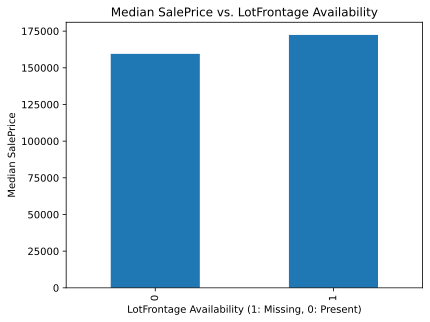

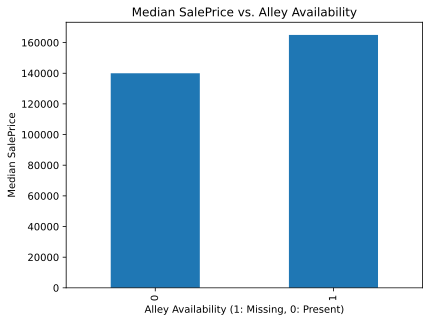

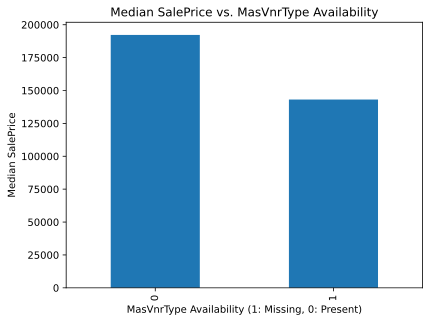

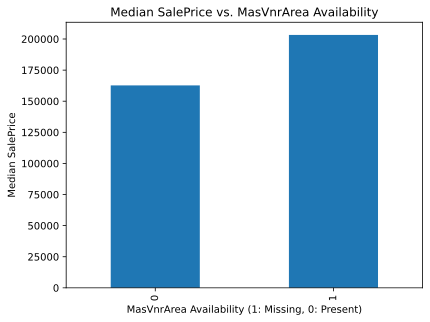

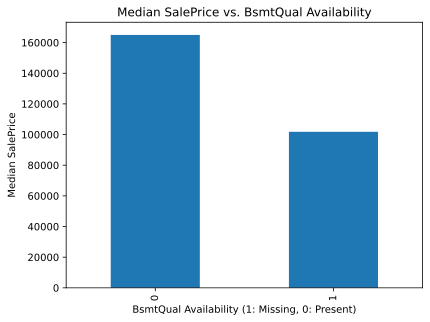

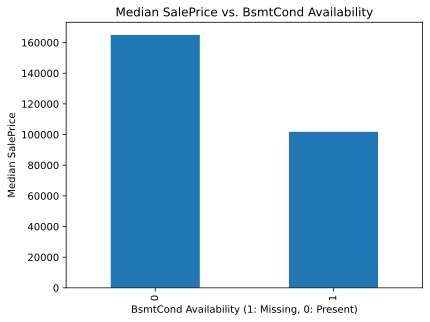

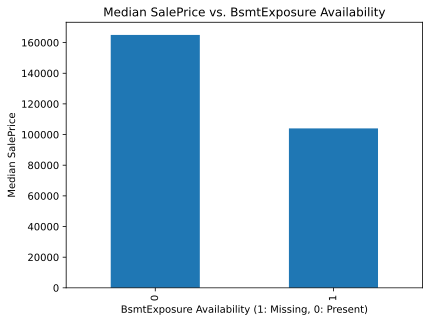

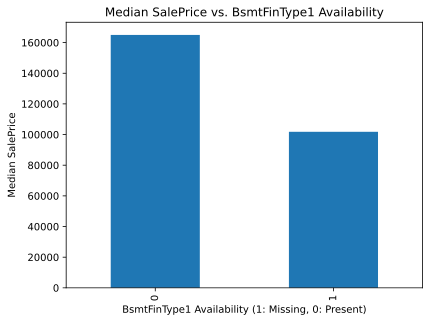

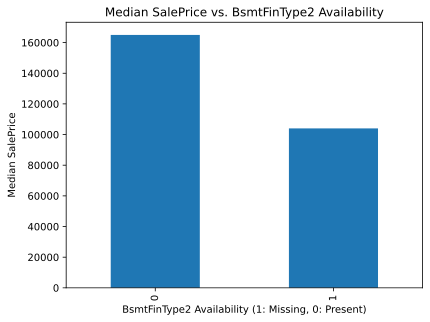

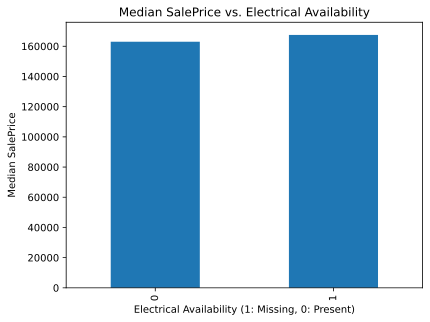

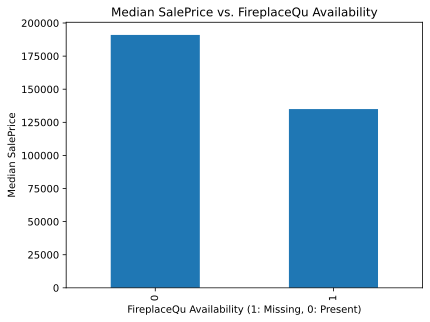

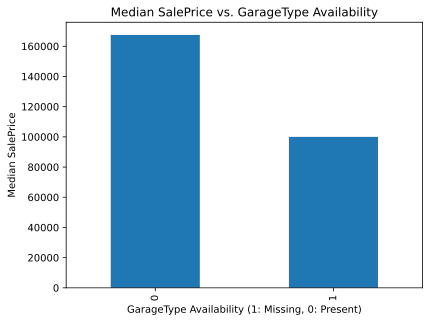

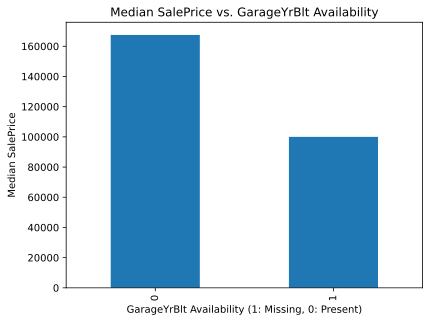

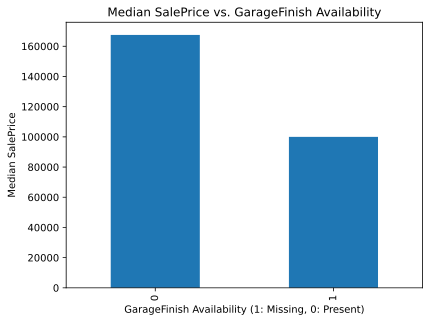

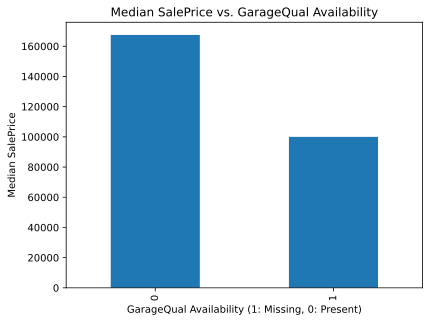

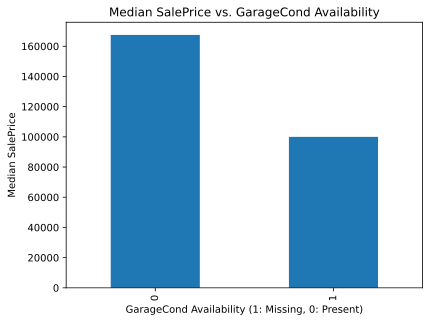

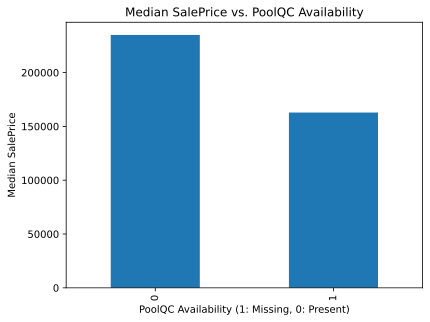

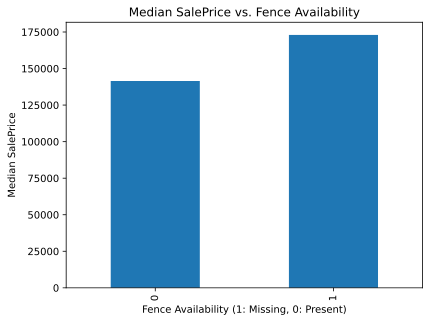

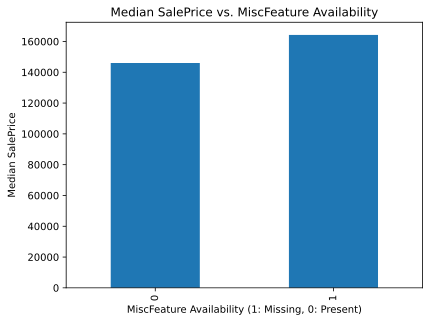

In [8]:
for feature in features_with_na:
    data = df.copy()
    
    data[feature + '_missing'] = np.where(data[feature].isnull(), 1, 0)
    
    median_prices = data.groupby(feature + '_missing')['SalePrice'].median()
    
    median_prices.plot.bar()
    
    plt.title(f"Median SalePrice vs. {feature} Availability")
    plt.xlabel(f"{feature} Availability (1: Missing, 0: Present)")
    plt.ylabel("Median SalePrice")
    
    plt.show()

#### We can clearly see the relationship between missing values and the dependent variable. In the Feature Engineering section, we'll replace these NaN values with meaningful values. Additionally, certain features like 'Id' are unnecessary for our analysis.

## Numerical Variables

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(f'Number of numerical variables: {len(numerical_features)}')
df[numerical_features].head()

Number of numerical variables: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

#### Temporal Variables(Eg: Datetime Variables)

##### From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [10]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
for feature in year_feature:
    unique_values = df[feature].unique()
    num_unique = len(unique_values)
    datatype = df[feature].dtype
    print(f"{feature} ({datatype}): {num_unique} unique values")
    
    if num_unique <= 10:
        print(unique_values)
    else:
        print(f"Too many unique values to display ({num_unique} in total)\n")

YearBuilt (int64): 112 unique values
Too many unique values to display (112 in total)

YearRemodAdd (int64): 61 unique values
Too many unique values to display (61 in total)

GarageYrBlt (float64): 98 unique values
Too many unique values to display (98 in total)

YrSold (int64): 5 unique values
[2008 2007 2006 2009 2010]


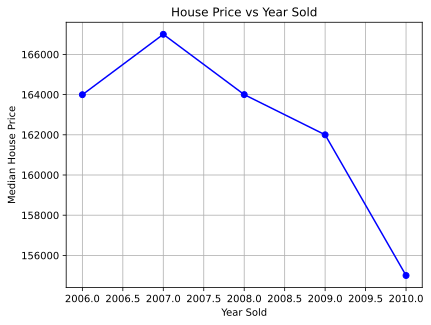

In [12]:
df.groupby('YrSold')['SalePrice'].median().plot(marker='o', linestyle='-', color='b', grid=True)
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")
plt.show()

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

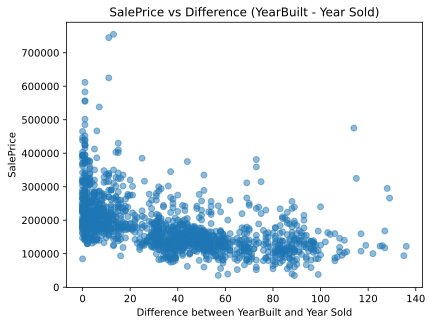

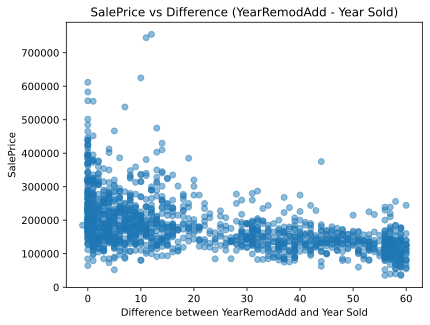

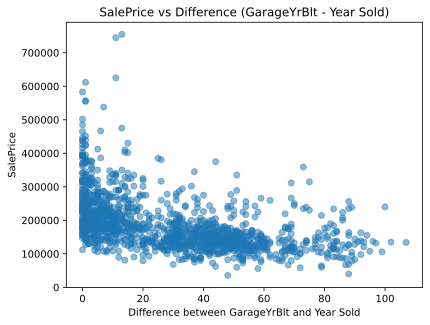

In [14]:
for feature in year_feature:
    if feature != 'YrSold':
        data = df.copy()
        
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature], data['SalePrice'], alpha=0.5)
        plt.xlabel(f'Difference between {feature} and Year Sold')
        plt.ylabel('SalePrice')
        plt.title(f"SalePrice vs Difference ({feature} - Year Sold)")
        plt.show()

In [15]:
discrete_feature = [feature for feature in numerical_features
                    if len(df[feature].unique()) < 25 and feature not in year_feature + ['Id']]

print(f"Discrete Variables Count: {len(discrete_feature)}")

print("Discrete Variables:")
for feature in discrete_feature:
    print(feature)

Discrete Variables Count: 17
Discrete Variables:
MSSubClass
OverallQual
OverallCond
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
3SsnPorch
PoolArea
MiscVal
MoSold


In [16]:
df[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

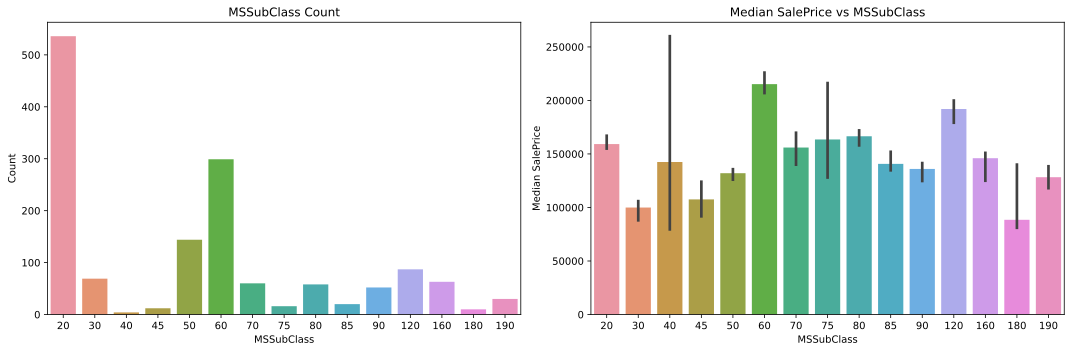

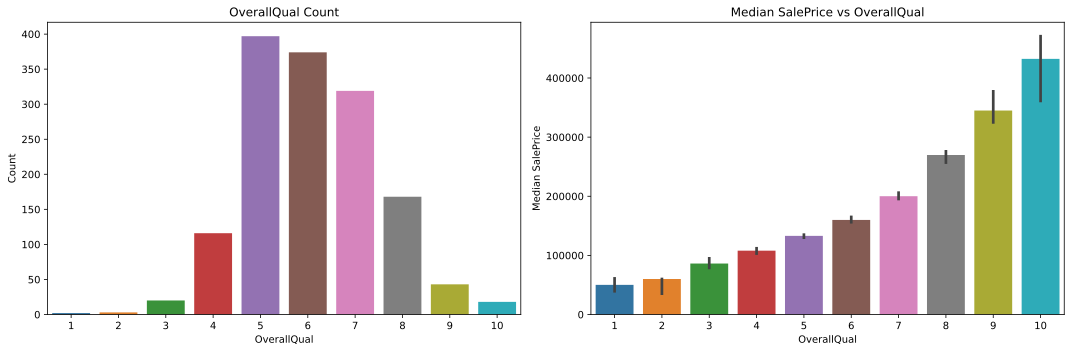

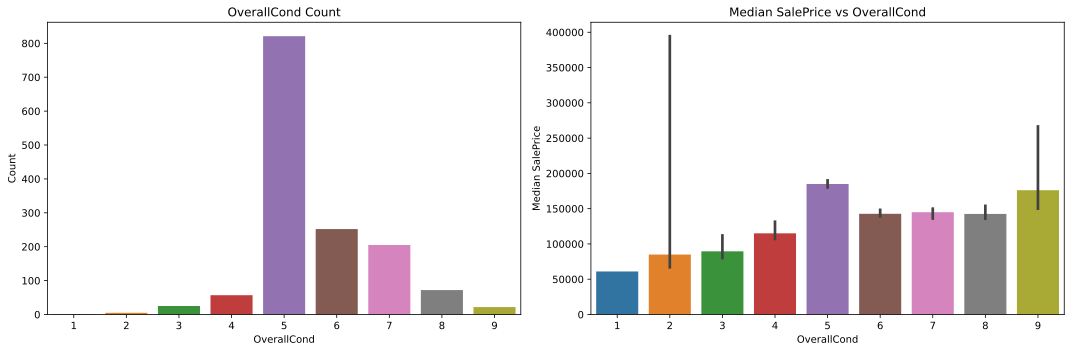

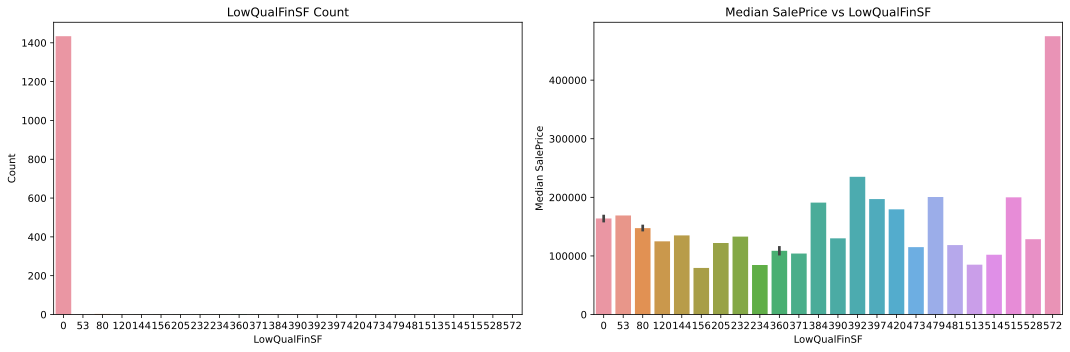

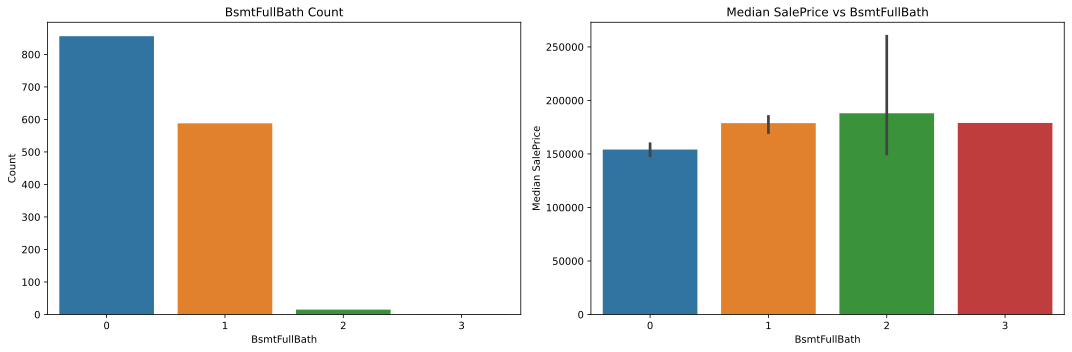

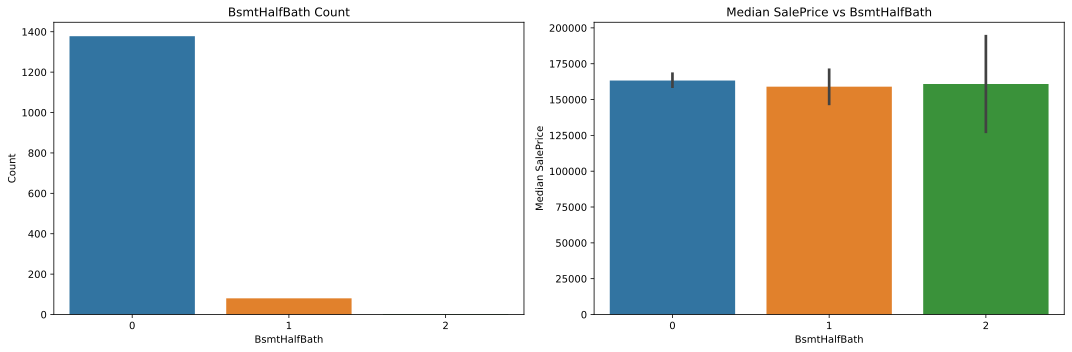

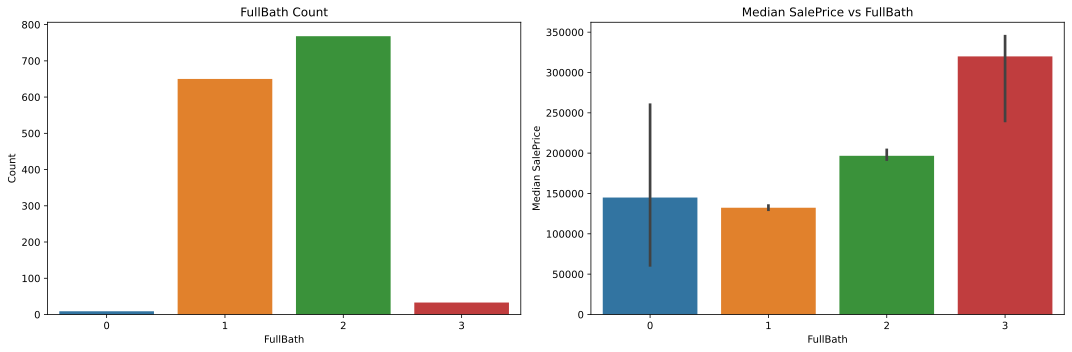

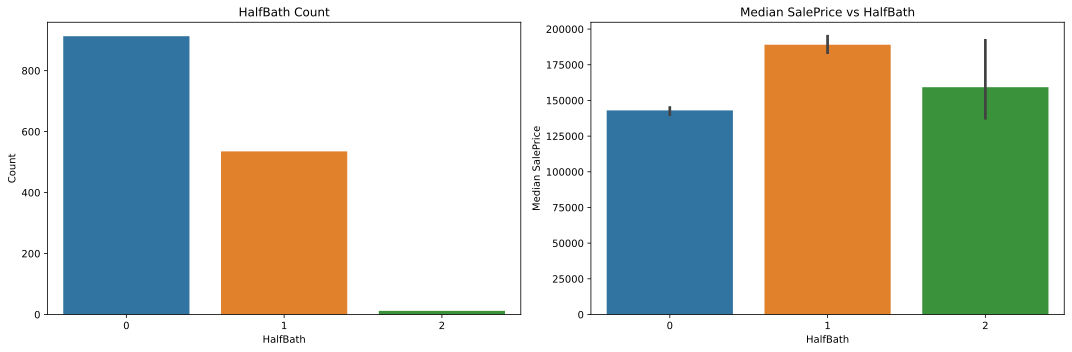

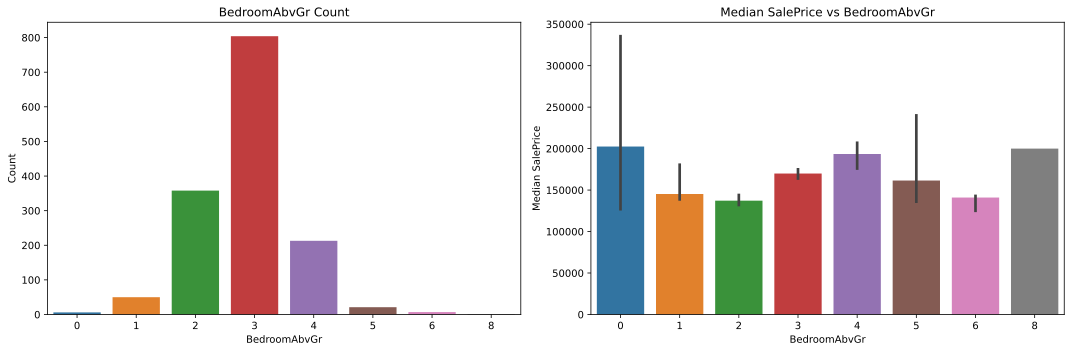

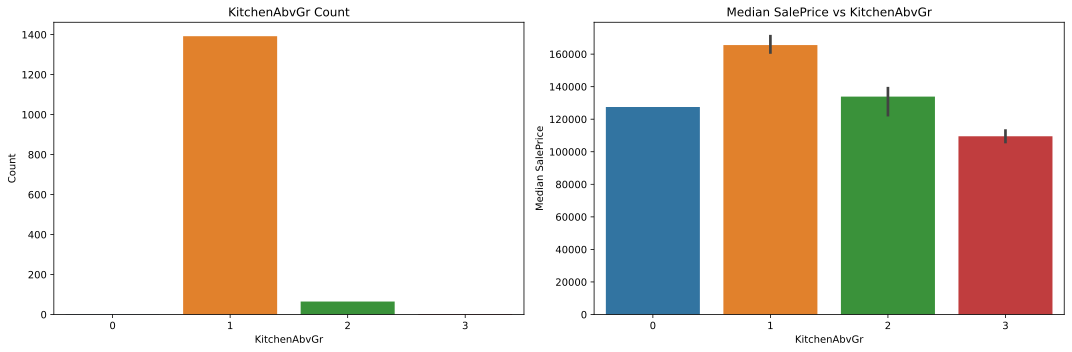

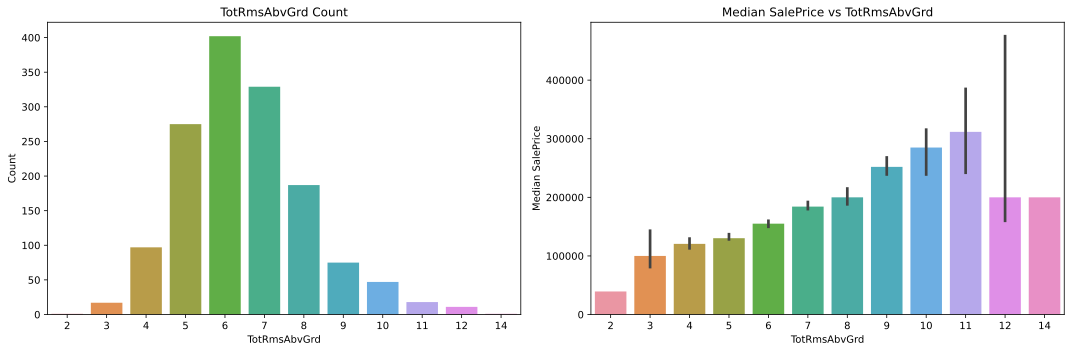

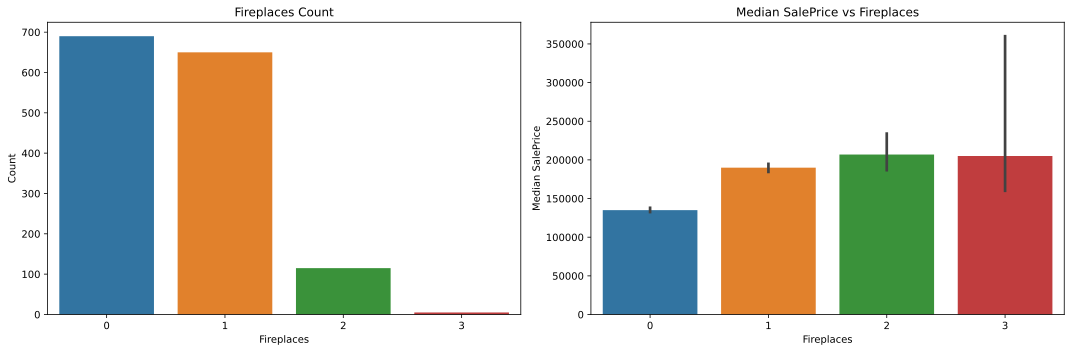

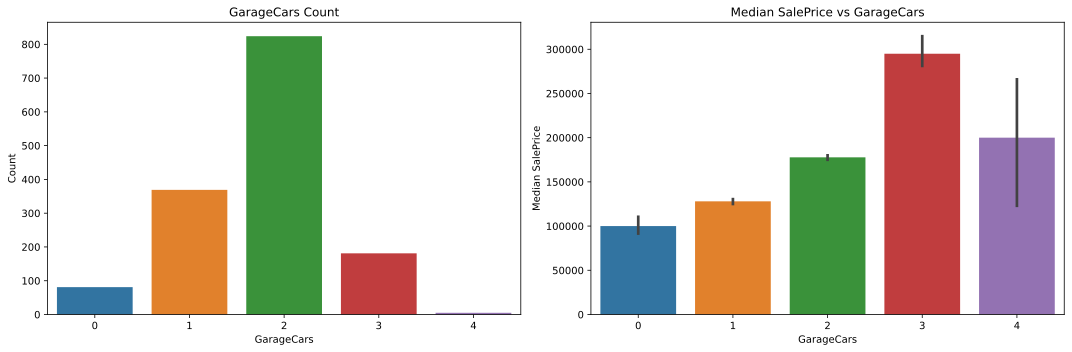

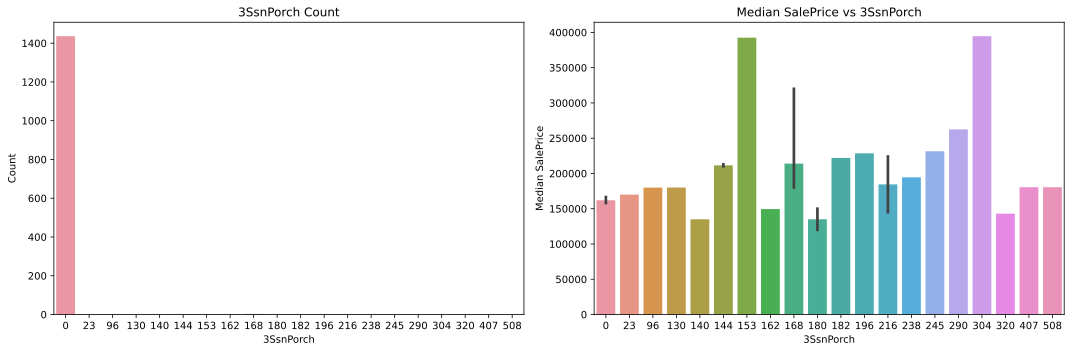

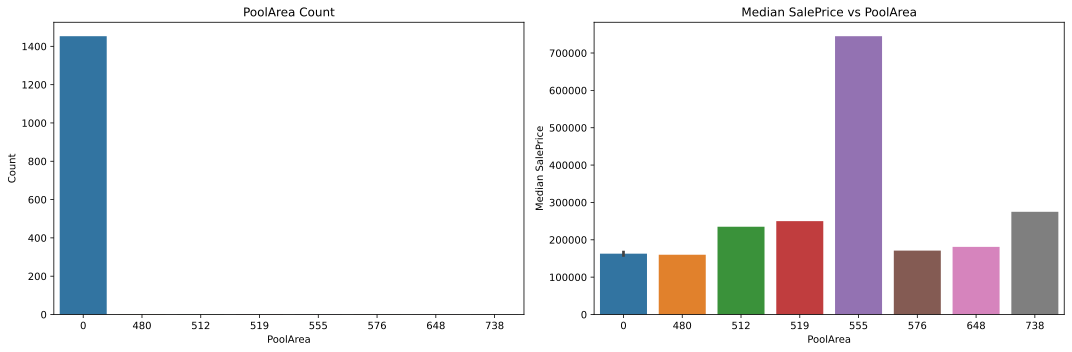

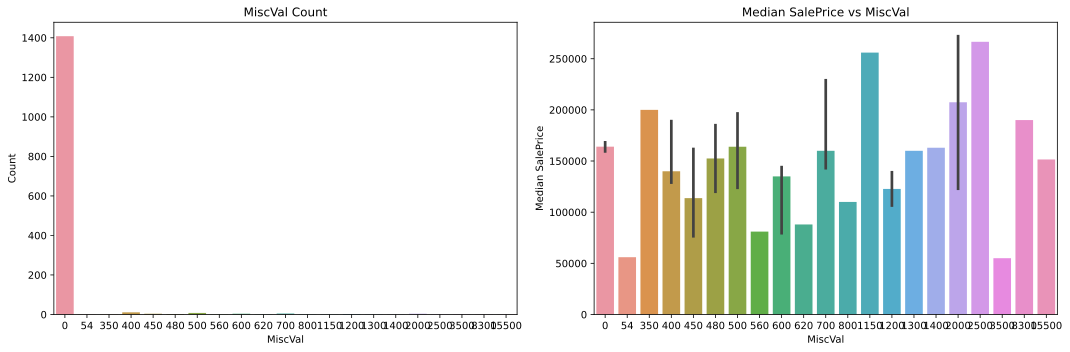

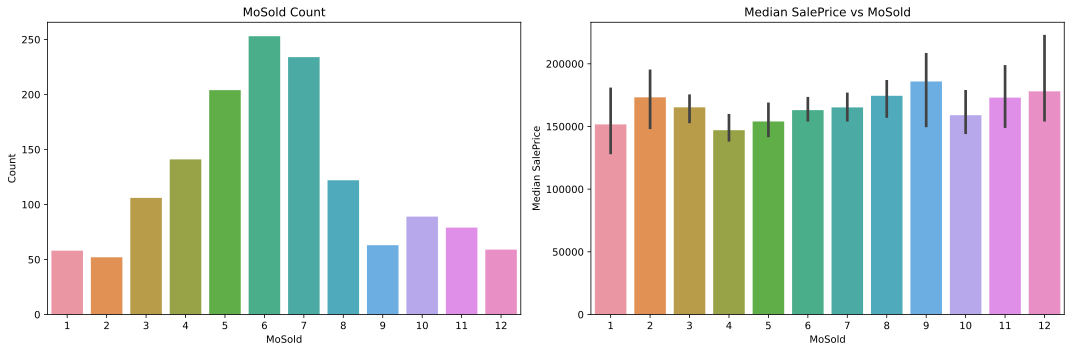

In [17]:
for feature in discrete_feature:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature} Count")
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.barplot(x=feature, y='SalePrice', data=df, estimator=np.median)
    plt.title(f"Median SalePrice vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')

    plt.tight_layout()
    plt.show()

## Continuous Variable

In [18]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]

print(f"Continuous Feature Count: {len(continuous_feature)}")

print("Continuous Features:")
for feature in continuous_feature:
    print(feature)

Continuous Feature Count: 16
Continuous Features:
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


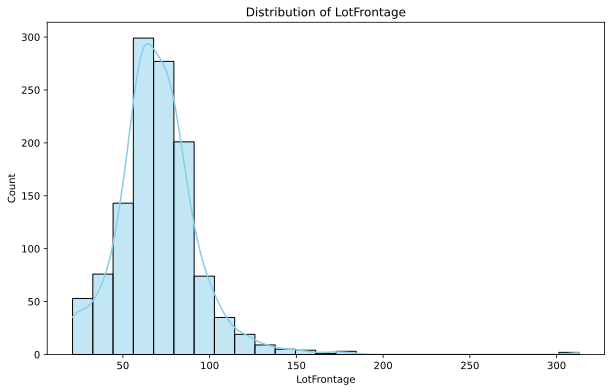

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


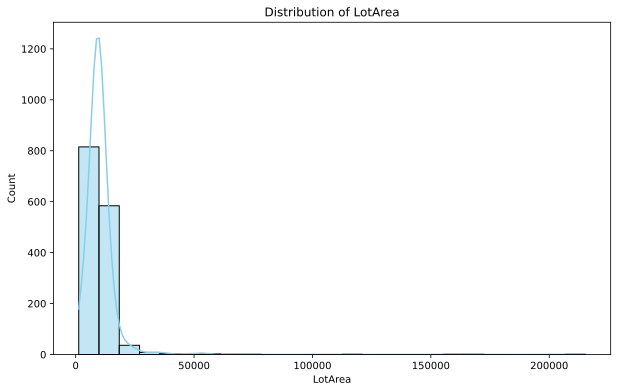

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


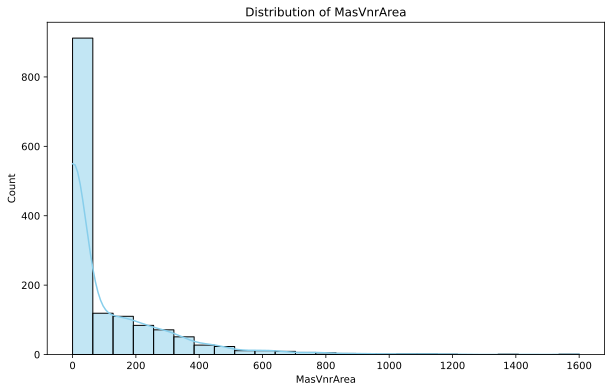

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


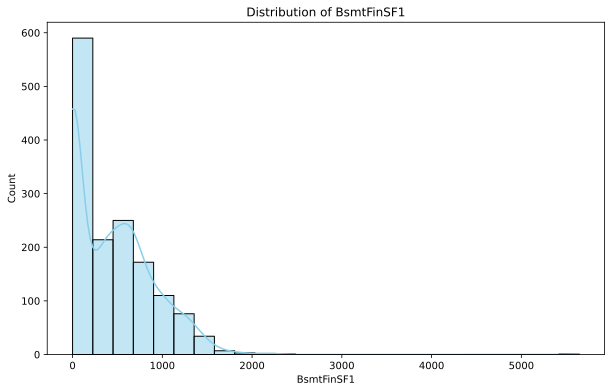

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


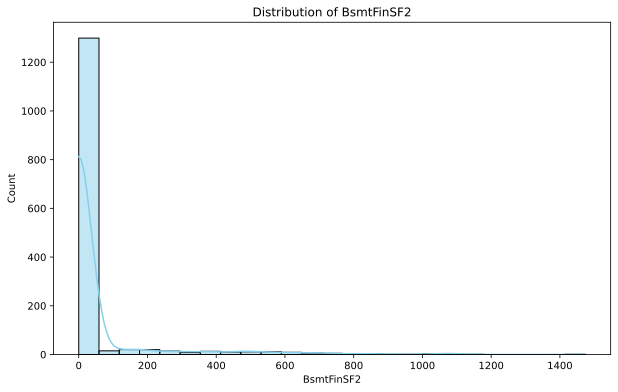

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


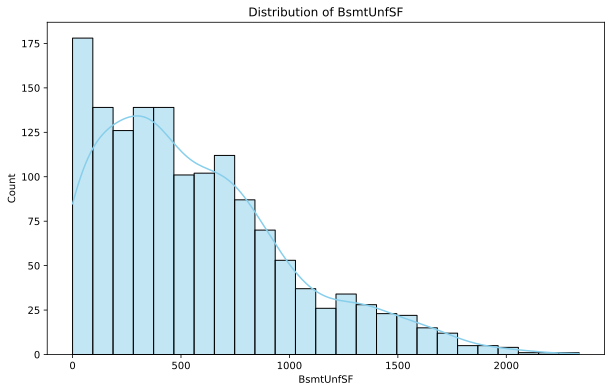

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


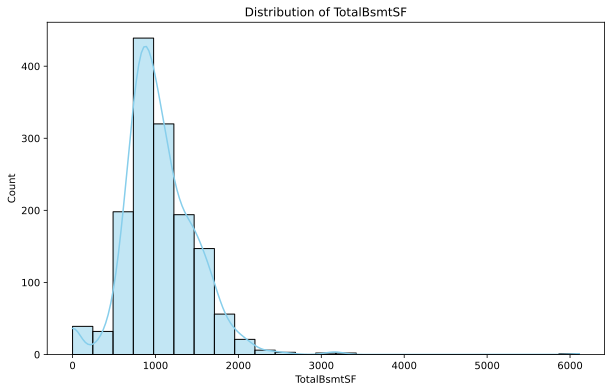

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


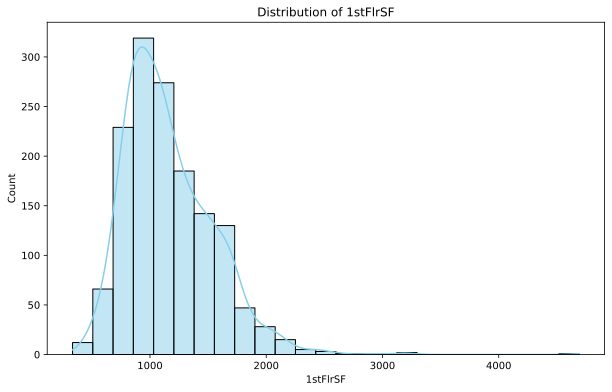

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


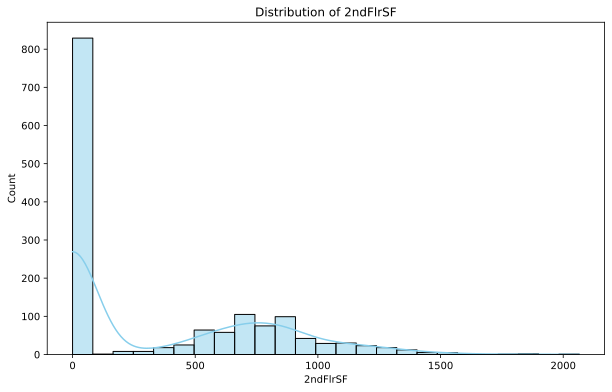

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


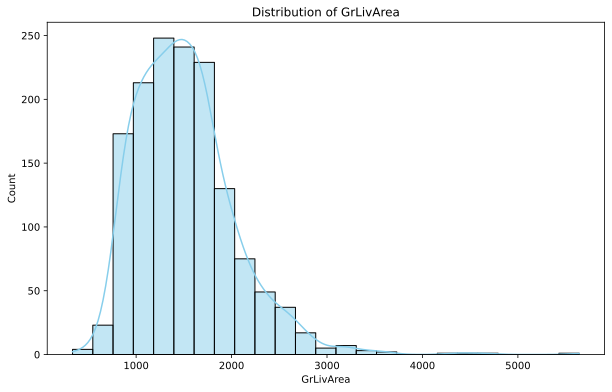

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


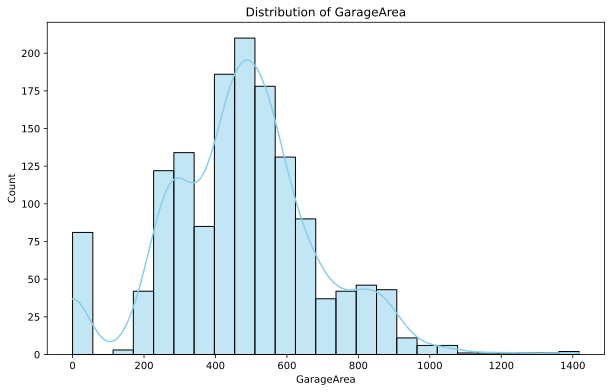

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


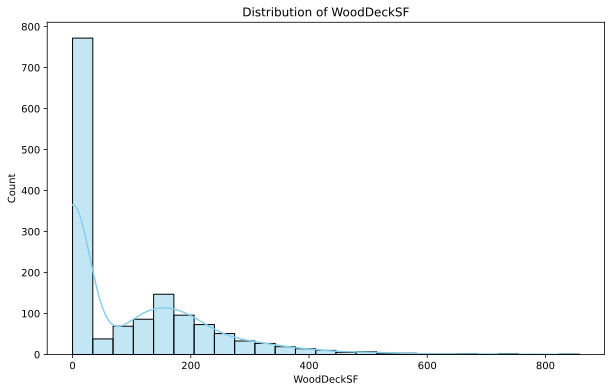

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


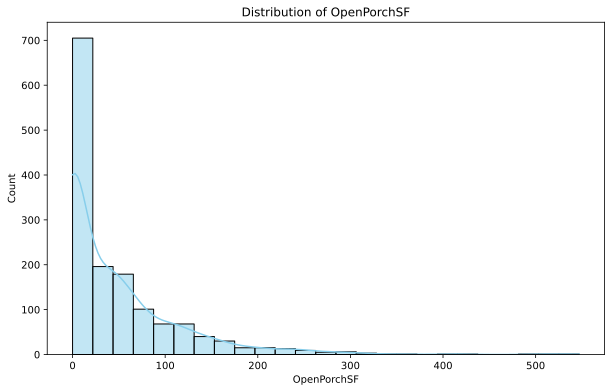

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


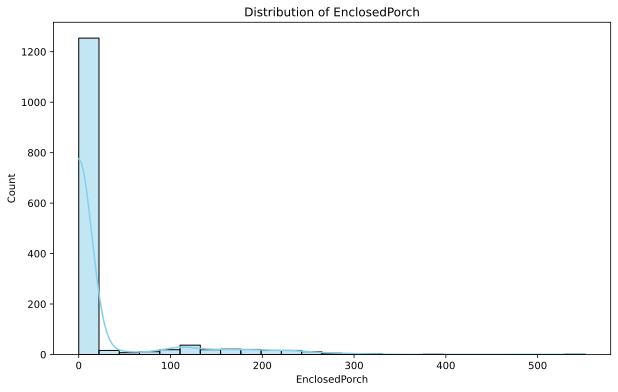

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


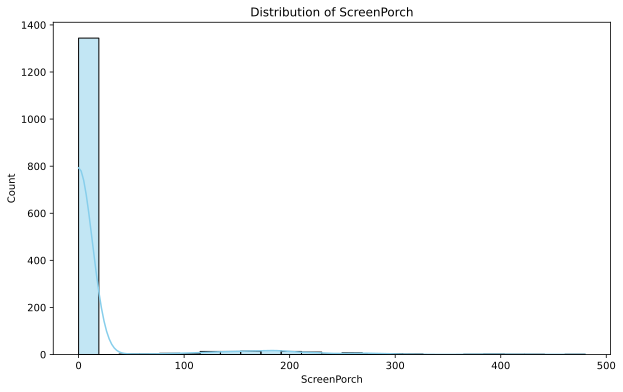

C:\Users\balan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


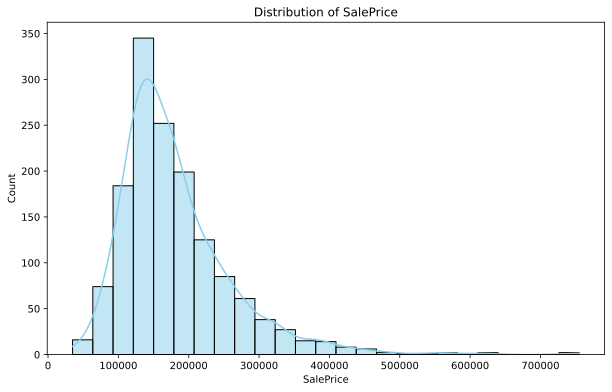

In [19]:
import seaborn as sns

for feature in continuous_feature:
    plt.figure(figsize=(10, 6))

    sns.histplot(data=df, x=feature, bins=25, kde=True, color='skyblue')

    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")

    plt.show()

## Exploratory Data Analysis Part 2

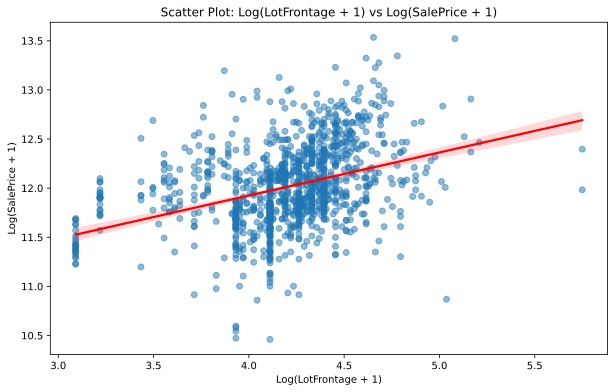

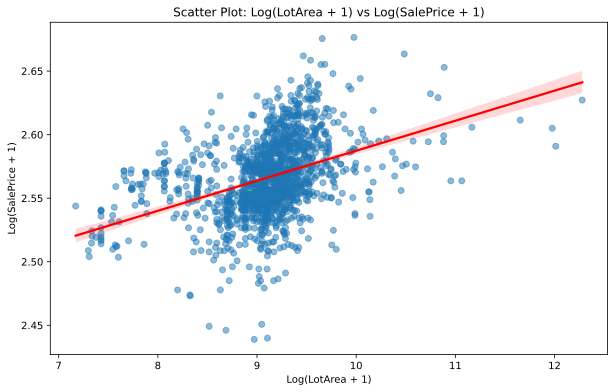

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

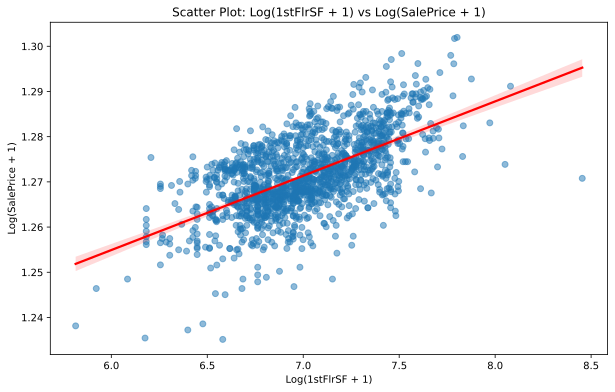

<Figure size 1000x600 with 0 Axes>

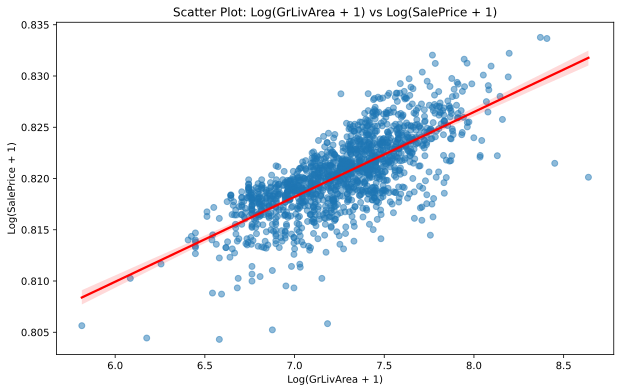

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

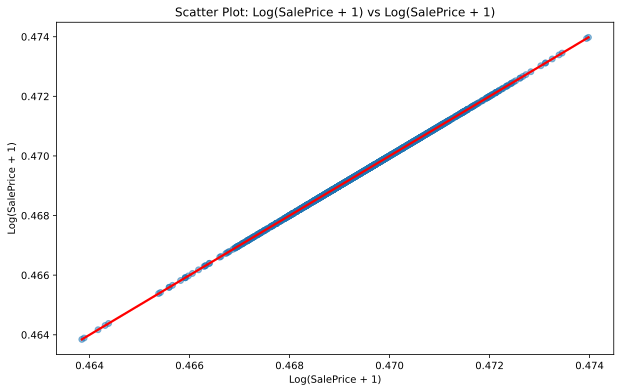

In [20]:
for feature in continuous_feature:
    plt.figure(figsize=(10, 6))
    if 0 in df[feature].unique():
        continue
    df[feature] = np.log1p(df[feature])
    df['SalePrice'] = np.log1p(df['SalePrice'])
    sns.regplot(x=feature, y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    plt.xlabel(f'Log({feature} + 1)') 
    plt.ylabel('Log(SalePrice + 1)')  
    plt.title(f'Scatter Plot: Log({feature} + 1) vs Log(SalePrice + 1)')
    plt.show()

## Outliers

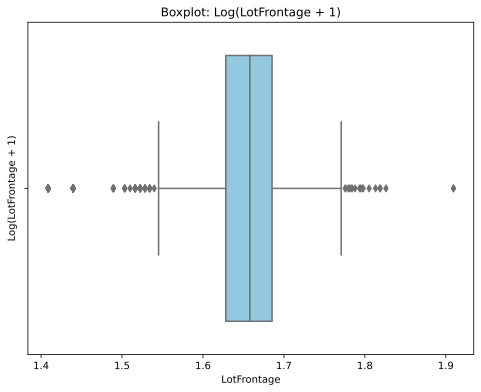

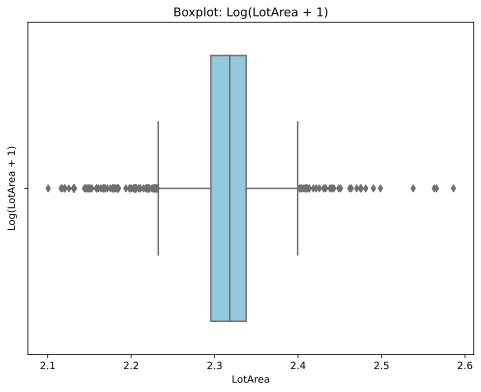

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

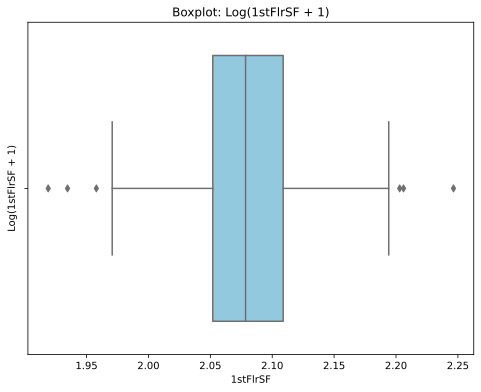

<Figure size 800x600 with 0 Axes>

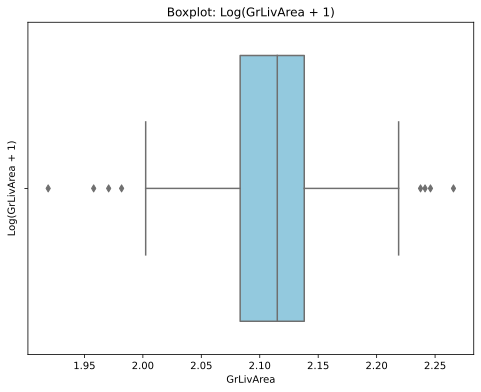

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

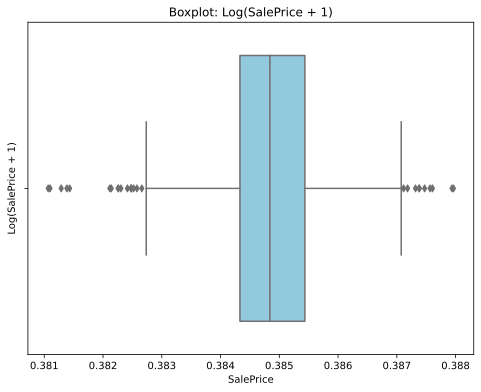

In [21]:
for feature in continuous_feature:
    plt.figure(figsize=(8, 6))
    if 0 in df[feature].unique():
        continue
    df[feature] = np.log1p(df[feature])
    sns.boxplot(x=feature, data=df, color='skyblue')
    plt.ylabel(f'Log({feature} + 1)')  
    plt.title(f'Boxplot: Log({feature} + 1)')
    plt.show()

## Categorical Variables

In [22]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

for feature in categorical_features:
    unique_values_count = df[feature].nunique()
    unique_values = df[feature].unique()
    
    print(f"{feature}: {unique_values_count} unique values")
    print(unique_values)
    print('\n' + '-'*50 + '\n')

MSZoning: 5 unique values
['RL' 'RM' 'C (all)' 'FV' 'RH']

--------------------------------------------------

Street: 2 unique values
['Pave' 'Grvl']

--------------------------------------------------

Alley: 2 unique values
[nan 'Grvl' 'Pave']

--------------------------------------------------

LotShape: 4 unique values
['Reg' 'IR1' 'IR2' 'IR3']

--------------------------------------------------

LandContour: 4 unique values
['Lvl' 'Bnk' 'Low' 'HLS']

--------------------------------------------------

Utilities: 2 unique values
['AllPub' 'NoSeWa']

--------------------------------------------------

LotConfig: 5 unique values
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

--------------------------------------------------

LandSlope: 3 unique values
['Gtl' 'Mod' 'Sev']

--------------------------------------------------

Neighborhood: 25 unique values
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTR

In [23]:
df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

## Find out the relationship between categorical variable and dependent feature SalesPrice

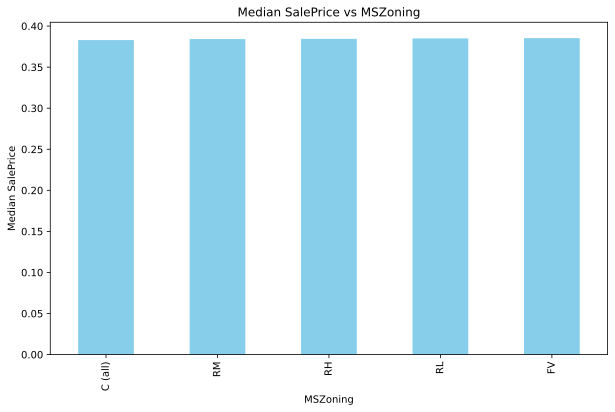

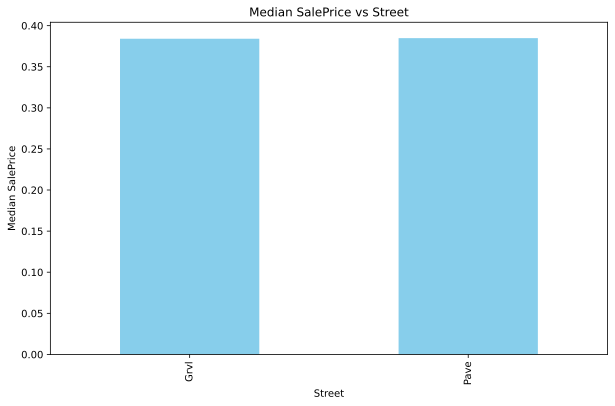

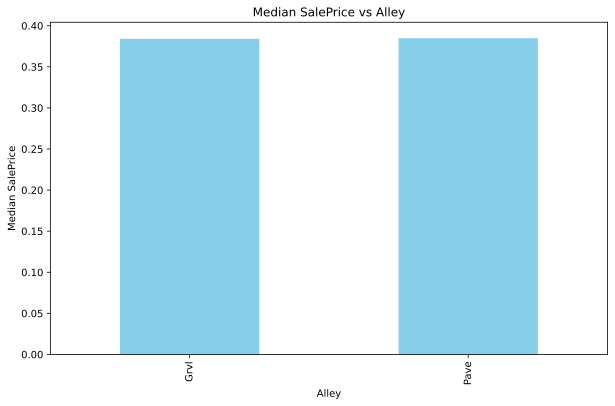

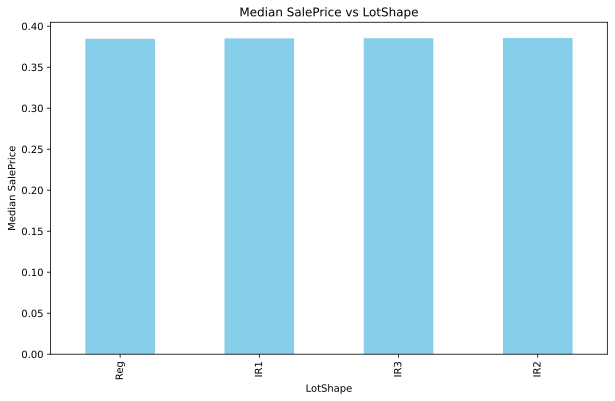

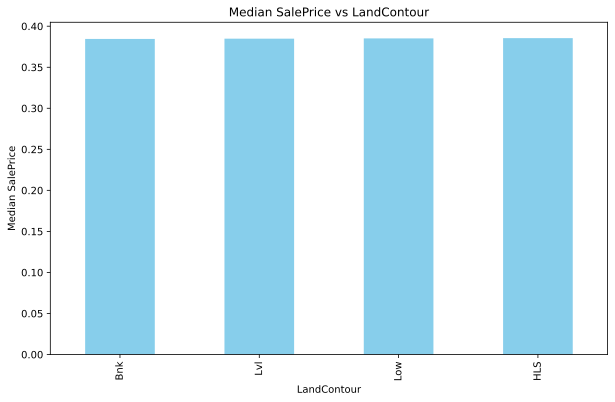

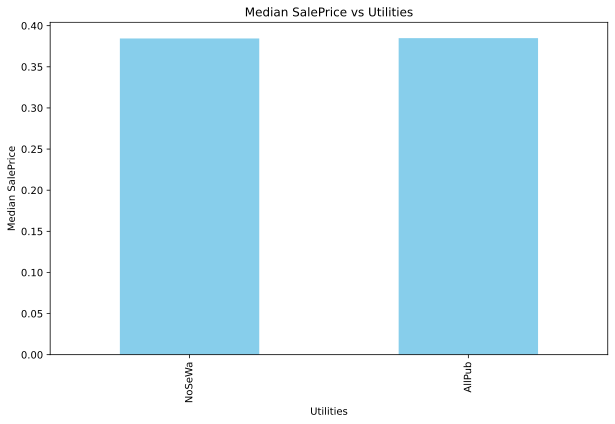

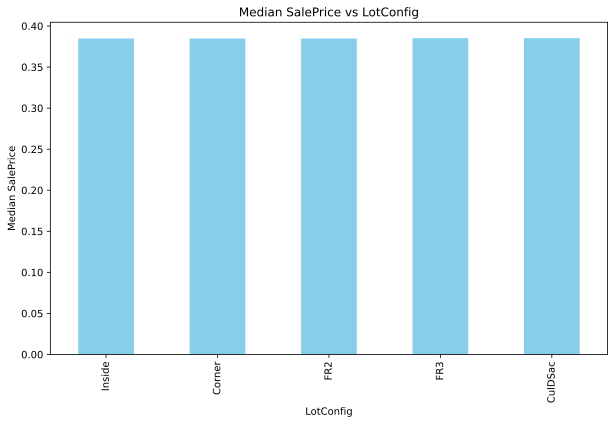

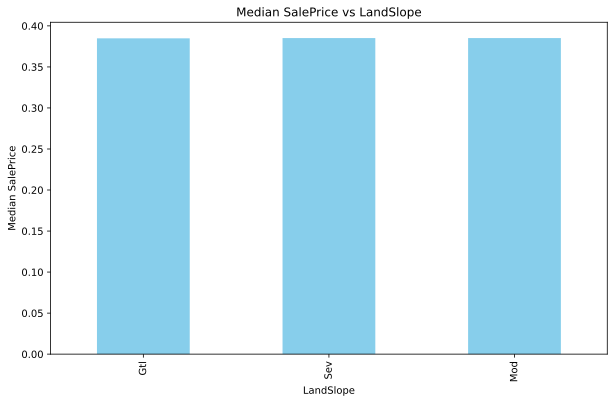

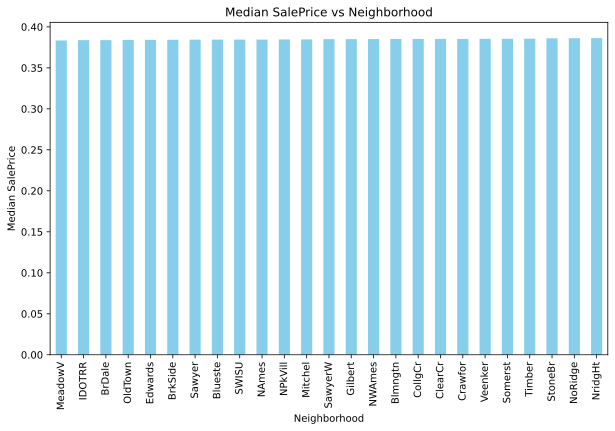

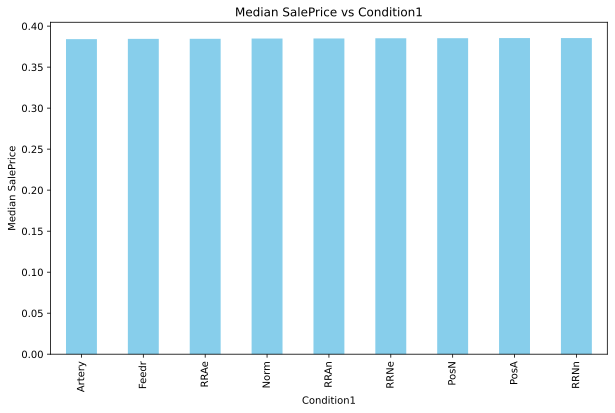

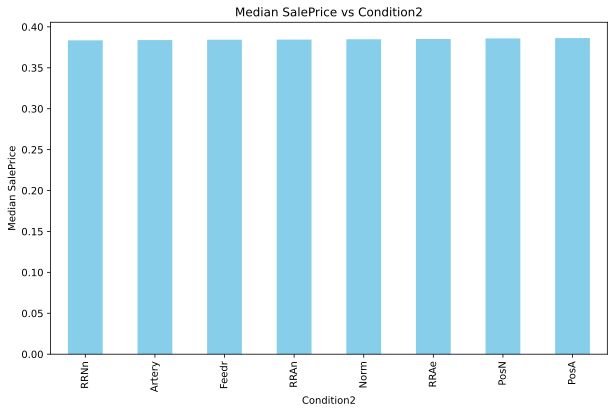

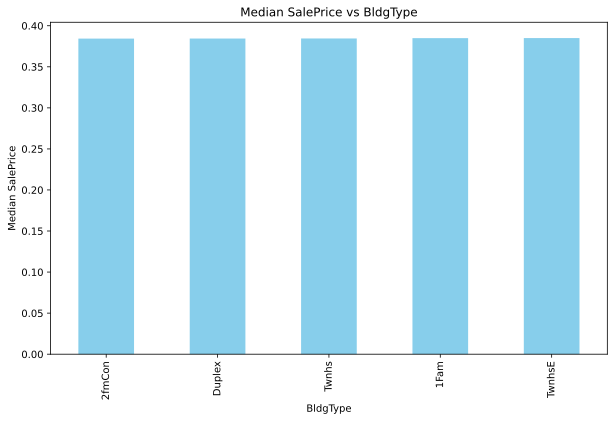

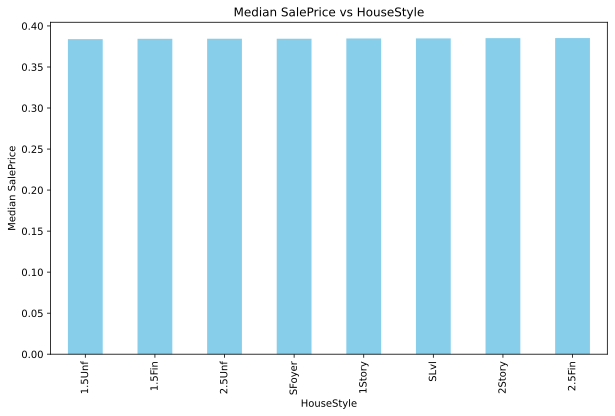

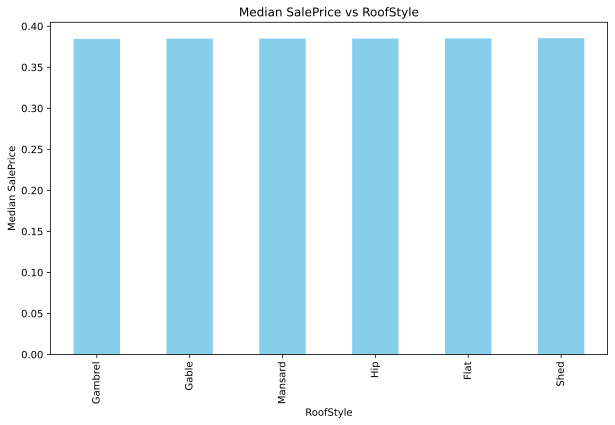

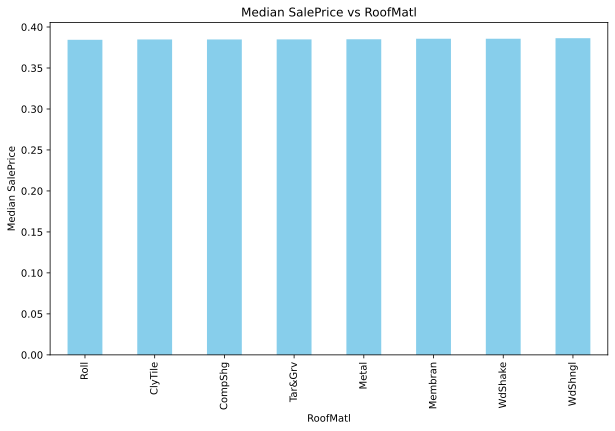

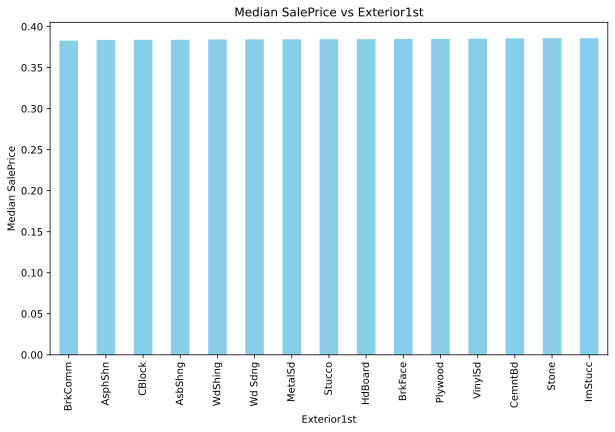

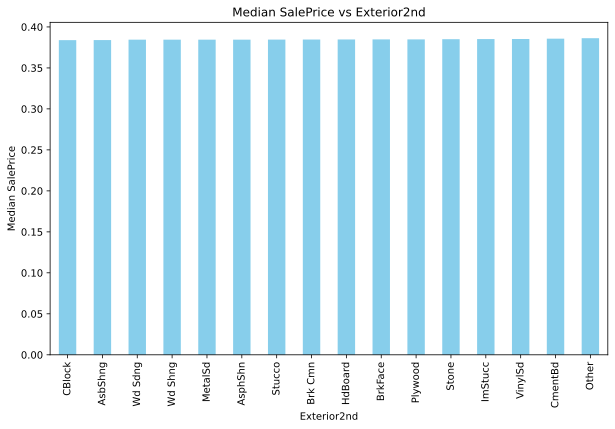

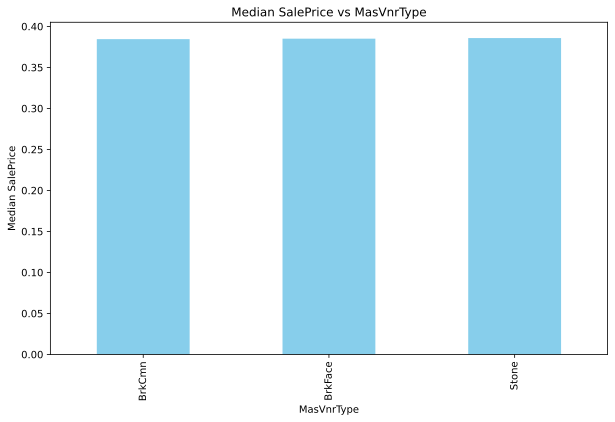

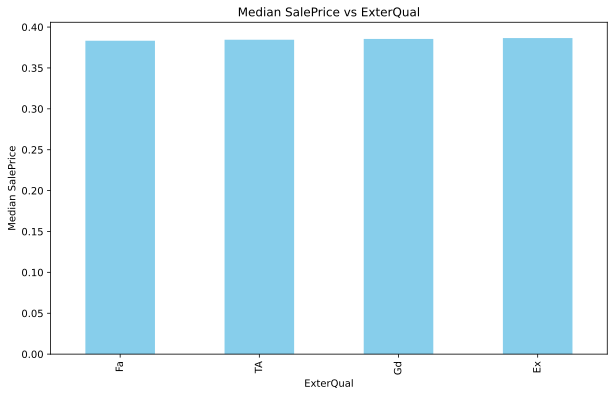

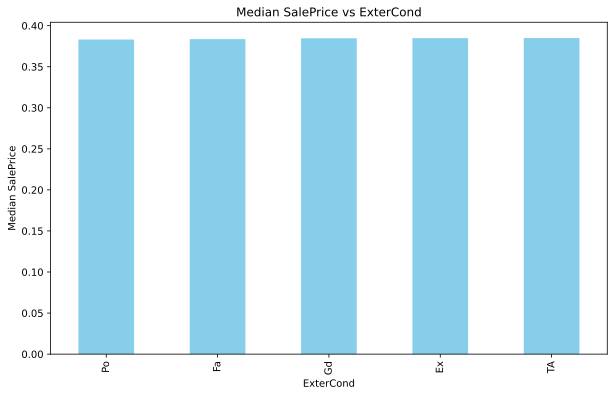

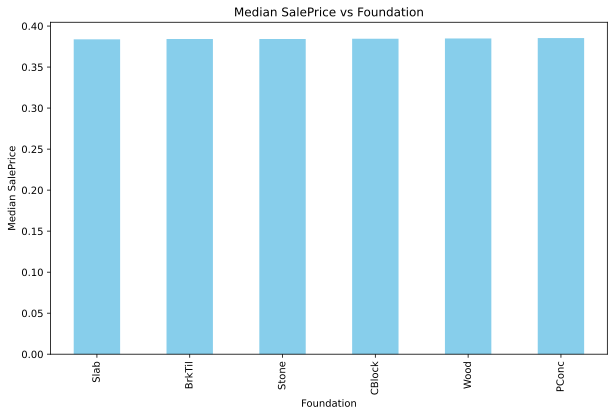

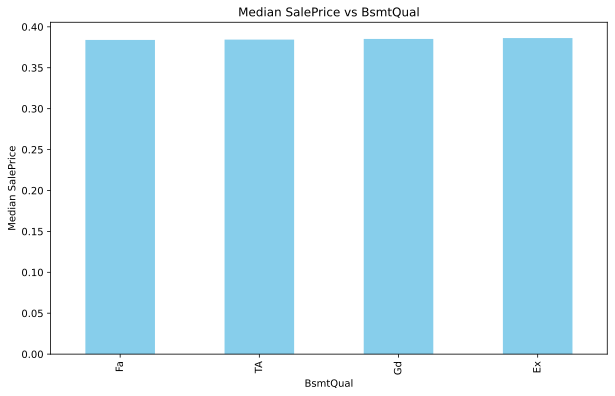

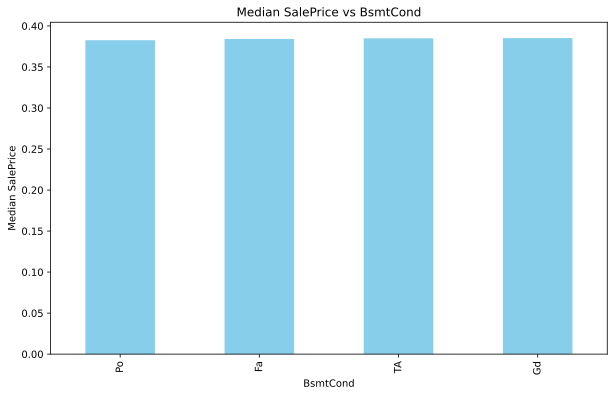

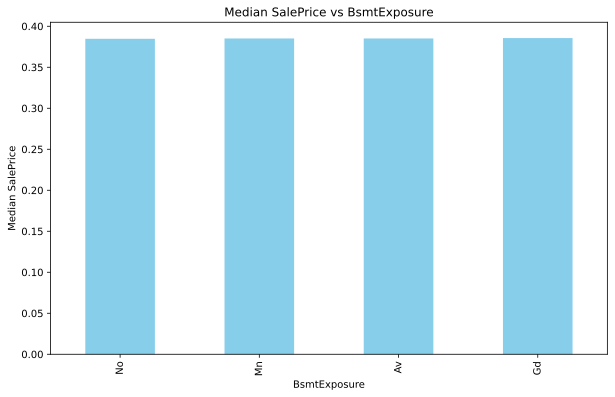

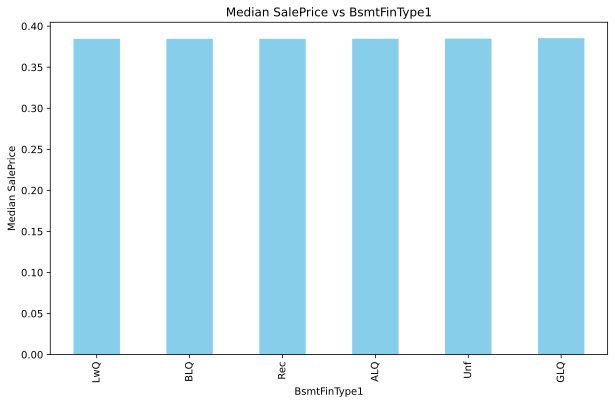

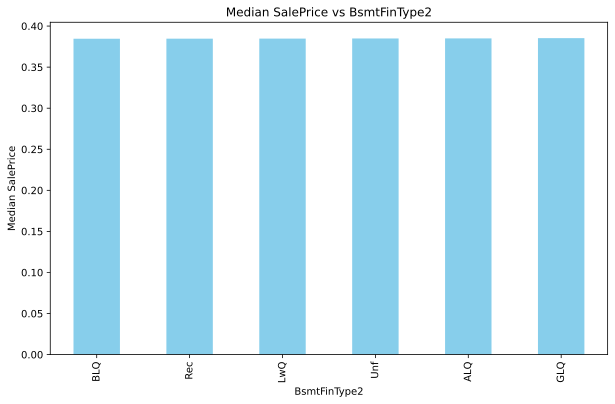

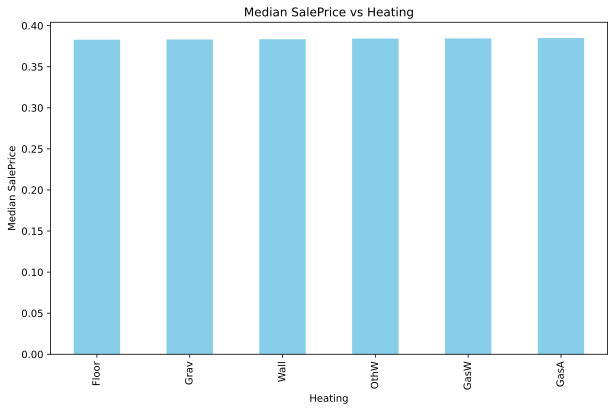

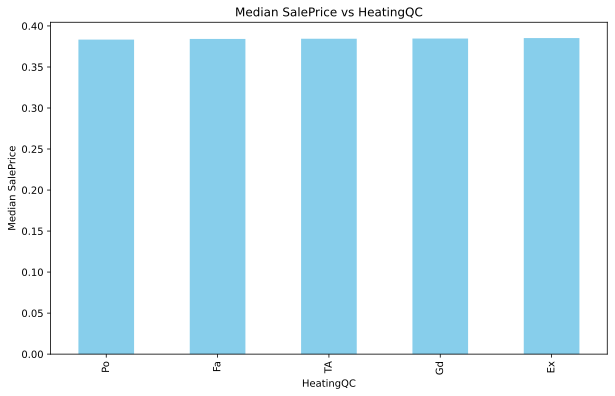

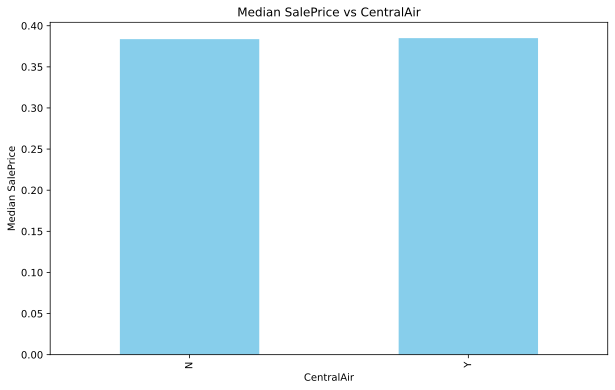

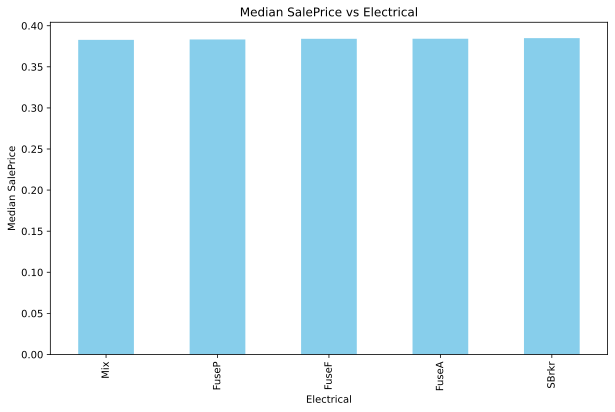

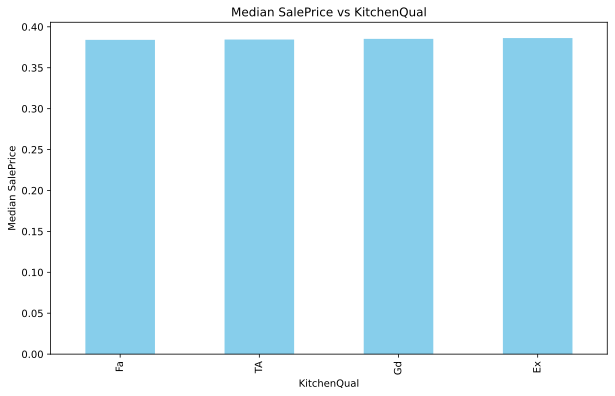

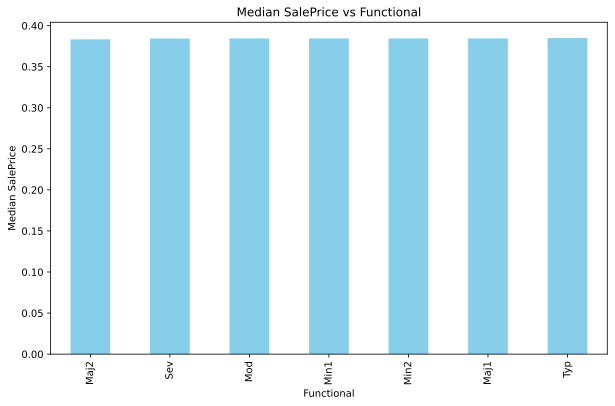

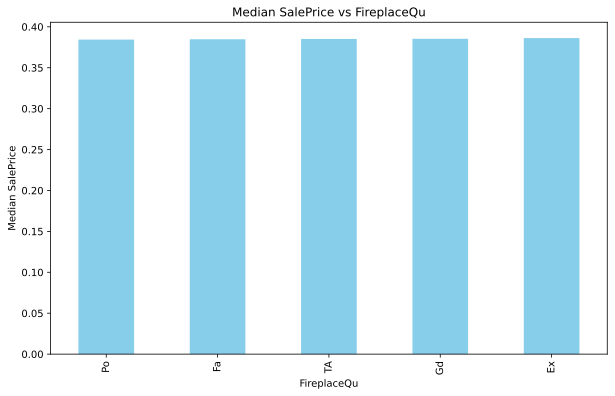

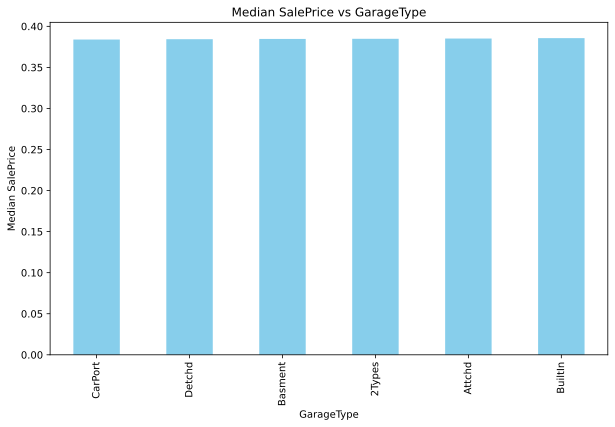

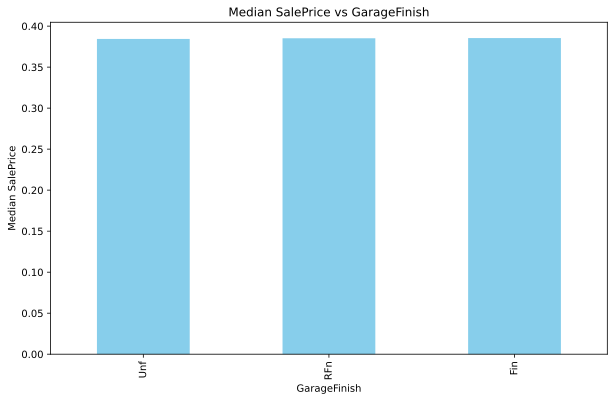

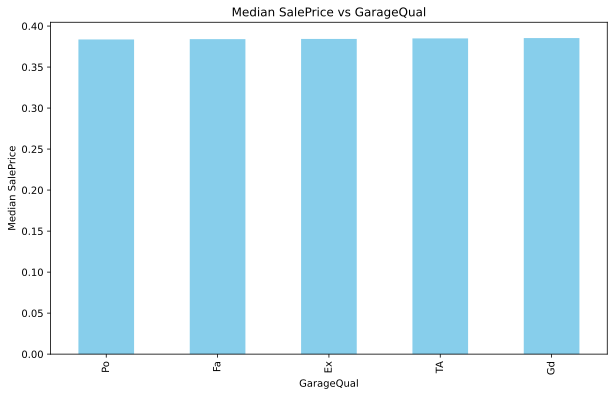

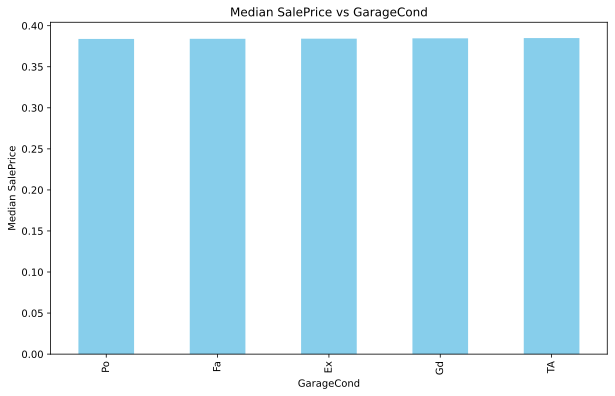

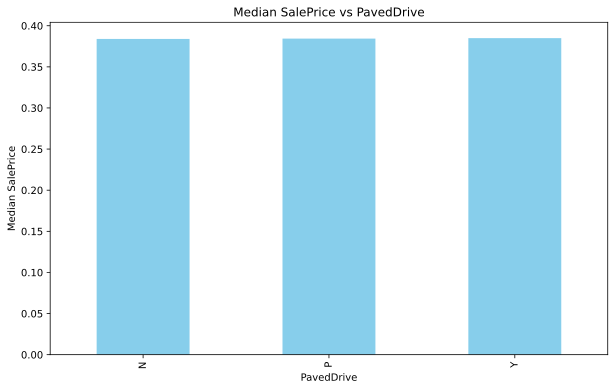

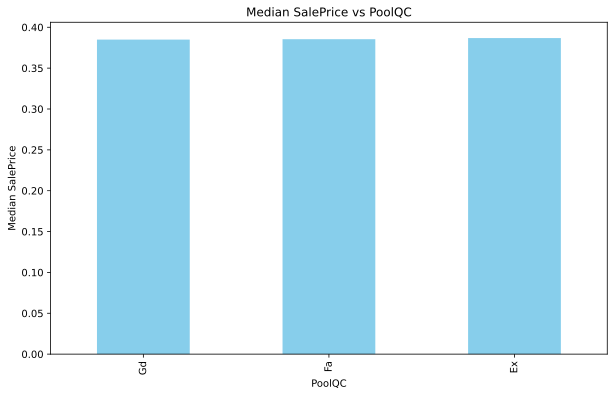

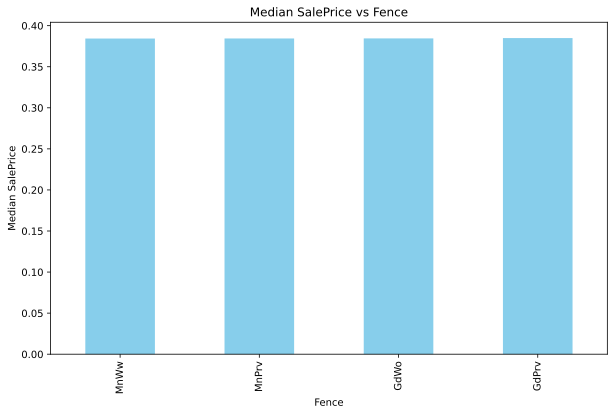

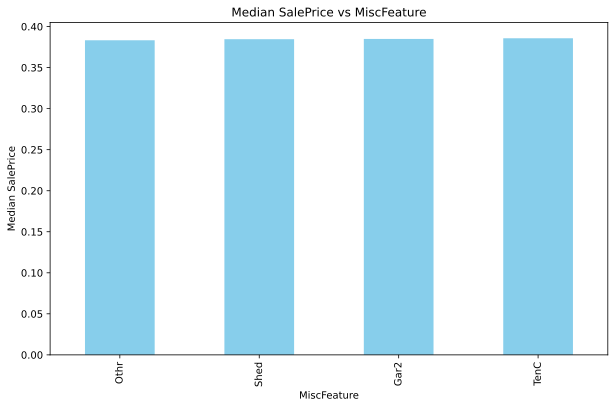

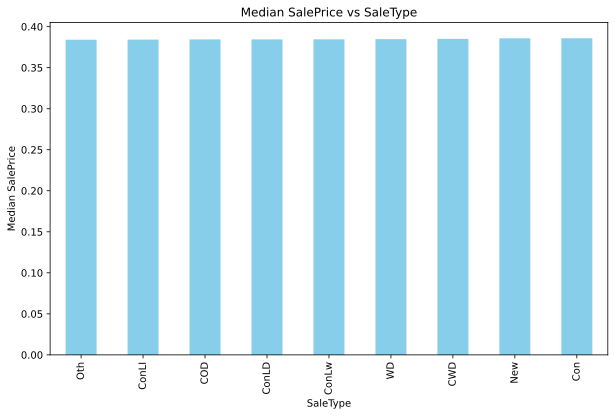

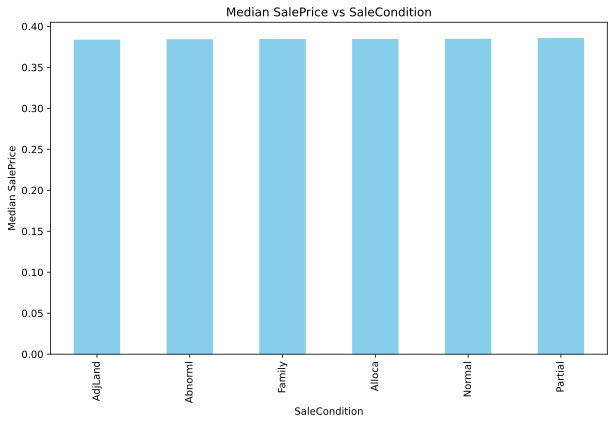

In [24]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    median_prices = df.groupby(feature)['SalePrice'].median().sort_values()
    median_prices.plot.bar(color='skyblue')
    for idx, value in enumerate(median_prices.values):
        count = df[df[feature] == median_prices.index[idx]].shape[0]
        std_dev = df[df[feature] == median_prices.index[idx]]['SalePrice'].std()
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.title(f'Median SalePrice vs {feature}')
    plt.show()

## Correlation Analysis

In [25]:
def correlation_analysis(df, plot=True):
    
    numeric_columns = df.select_dtypes(include=[int,float])
    correlation_matrix = numeric_columns.corr()

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="0.0f", linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    return correlation_matrix


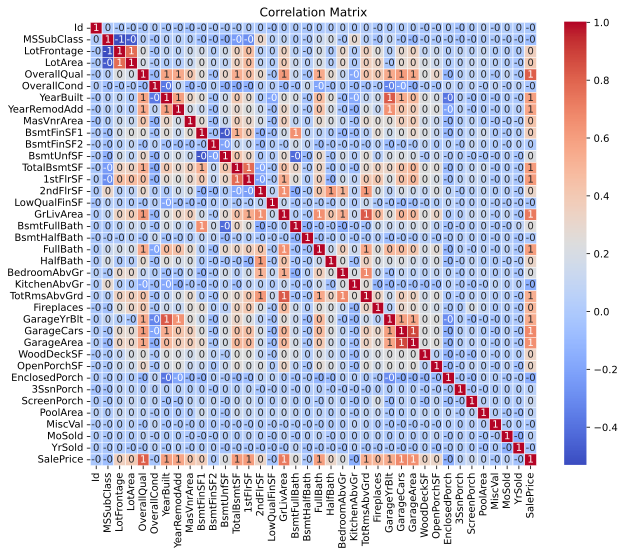

In [26]:
correlation_matrix = correlation_analysis(df)

<Axes: >

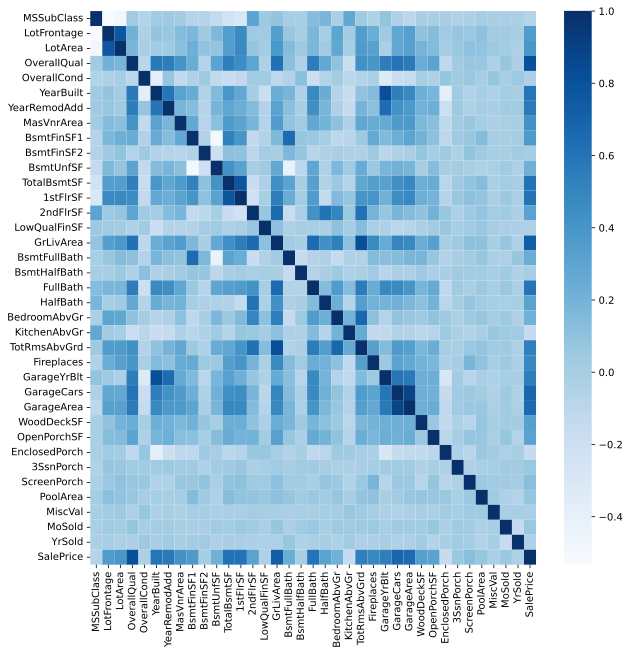

In [27]:
corr = df.drop(columns='Id').corr(numeric_only=True)

plt.figure(figsize=(10,10), dpi=200)

sns.heatmap(corr, cmap="Blues")

In [28]:
correlation=corr["SalePrice"].apply(abs).sort_values(ascending=False).reset_index()
print(correlation.shape)
correlation

(37, 2)


index  SalePrice
0       SalePrice   1.000000
1     OverallQual   0.813545
2       GrLivArea   0.729203
3      GarageCars   0.679657
4      GarageArea   0.648676
5     TotalBsmtSF   0.607319
6        1stFlrSF   0.605769
7        FullBath   0.593258
8       YearBuilt   0.588436
9    YearRemodAdd   0.567230
10    GarageYrBlt   0.543279
11   TotRmsAbvGrd   0.530547
12     Fireplaces   0.487747
13     MasVnrArea   0.422335
14        LotArea   0.395120
15     BsmtFinSF1   0.368181
16    LotFrontage   0.357284
17     WoodDeckSF   0.332418
18    OpenPorchSF   0.317352
19       2ndFlrSF   0.316689
20       HalfBath   0.314867
21   BsmtFullBath   0.235321
22      BsmtUnfSF   0.220371
23   BedroomAbvGr   0.213193
24  EnclosedPorch   0.150240
25   KitchenAbvGr   0.146962
26    ScreenPorch   0.121547
27     MSSubClass   0.071599
28       PoolArea   0.067714
29         MoSold   0.057419
30      3SsnPorch   0.055529
31   LowQualFinSF   0.038703
32         YrSold   0.038238
33    OverallCond   0.029581
34        MiscVal   0.019897
35     BsmtFinSF2   0.007023
36   BsmtHalfBath   0.002767

#### Therefore, SalePrice is the highest important feature

## Feature Engineering

- Handle missing values
- Encode categorical variables
- Extract temporal features
- Apply log transformation
- Create interaction features
- Binning/Discretization


## Feature Selection

- Correlation analysis
- Univariate feature selection
- Feature importance from trees
- Lasso Regression
- Recursive Feature Elimination (RFE)
- Variance Thresholding

## Cleaning and Preparing the data

- Feature Selection

In [29]:
df = df.drop((missing_data[missing_data['Total'] > 81]).index, axis=1)  # Remove columns with more than 81 NaN values
df = df.drop(df.loc[df['Electrical'].isnull()].index)  # Remove rows with NaN in 'Electrical'
print(f"Shape after deleting columns with more than 81 NaN values: {df.shape}")
df.isnull().sum().max()

Shape after deleting columns with more than 81 NaN values: (1459, 74)


81

In [30]:
print(f"Before deleting weak correlation => {df.shape}")
df = df.drop(correlation.iloc[21:, 0].values, axis=1)  # Remove columns with weak correlation
print(f"After deleting weak correlation => {df.shape}")

Before deleting weak correlation => (1459, 74)
After deleting weak correlation => (1459, 58)


## Dealing with missing data

In [31]:
name_of_coll = df.drop(columns="Id").select_dtypes(include=['number']).columns
for col in name_of_coll:
    nan_indices = df[col].isnull()  # Find the indices of NaN
    random_samples = df[col].dropna().sample(n=nan_indices.sum(), replace=True)  # Sample of the column without NaN
    df.loc[nan_indices, col] = random_samples.values

In [32]:
col_has_numbers = df.drop(columns="Id").select_dtypes(include=['number'])
col_has_numbers.isnull().sum().sort_values(ascending=False)

LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [33]:
name_of_coll = df.drop(columns="Id").select_dtypes(include=['object']).columns

for col in name_of_coll:
    # Using mode()
    mode_for_coll = df[col].mode()[0]
    df[col].fillna(mode_for_coll, inplace=True)

C:\Users\balan\AppData\Local\Temp\ipykernel_16188\1464038081.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_for_coll, inplace=True)


In [34]:
col_has_objects = df.drop(columns="Id").select_dtypes(include=['object'])
col_has_objects.isnull().sum().sort_values(ascending=False)

MSZoning         0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
ExterCond        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
SaleCondition    0
dtype: int64

## Dealing with outliers

In [35]:
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower) | (dataframe[column] > upper)]
    dataframe.loc[(dataframe[column] > upper), column] = upper
    dataframe.loc[(dataframe[column] < lower), column] = lower 
    return dataframe

In [36]:
for col in df.drop(columns="Id").select_dtypes(include=["number"]).columns:
    df = handle_outliers_iqr(df, col)

C:\Users\balan\AppData\Local\Temp\ipykernel_16188\469410327.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2059.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column] > upper), column] = upper
C:\Users\balan\AppData\Local\Temp\ipykernel_16188\469410327.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1781.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column] > upper), column] = upper
C:\Users\balan\AppData\Local\Temp\ipykernel_16188\469410327.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2052.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data

This plot shows the outliers in each column after deleting them


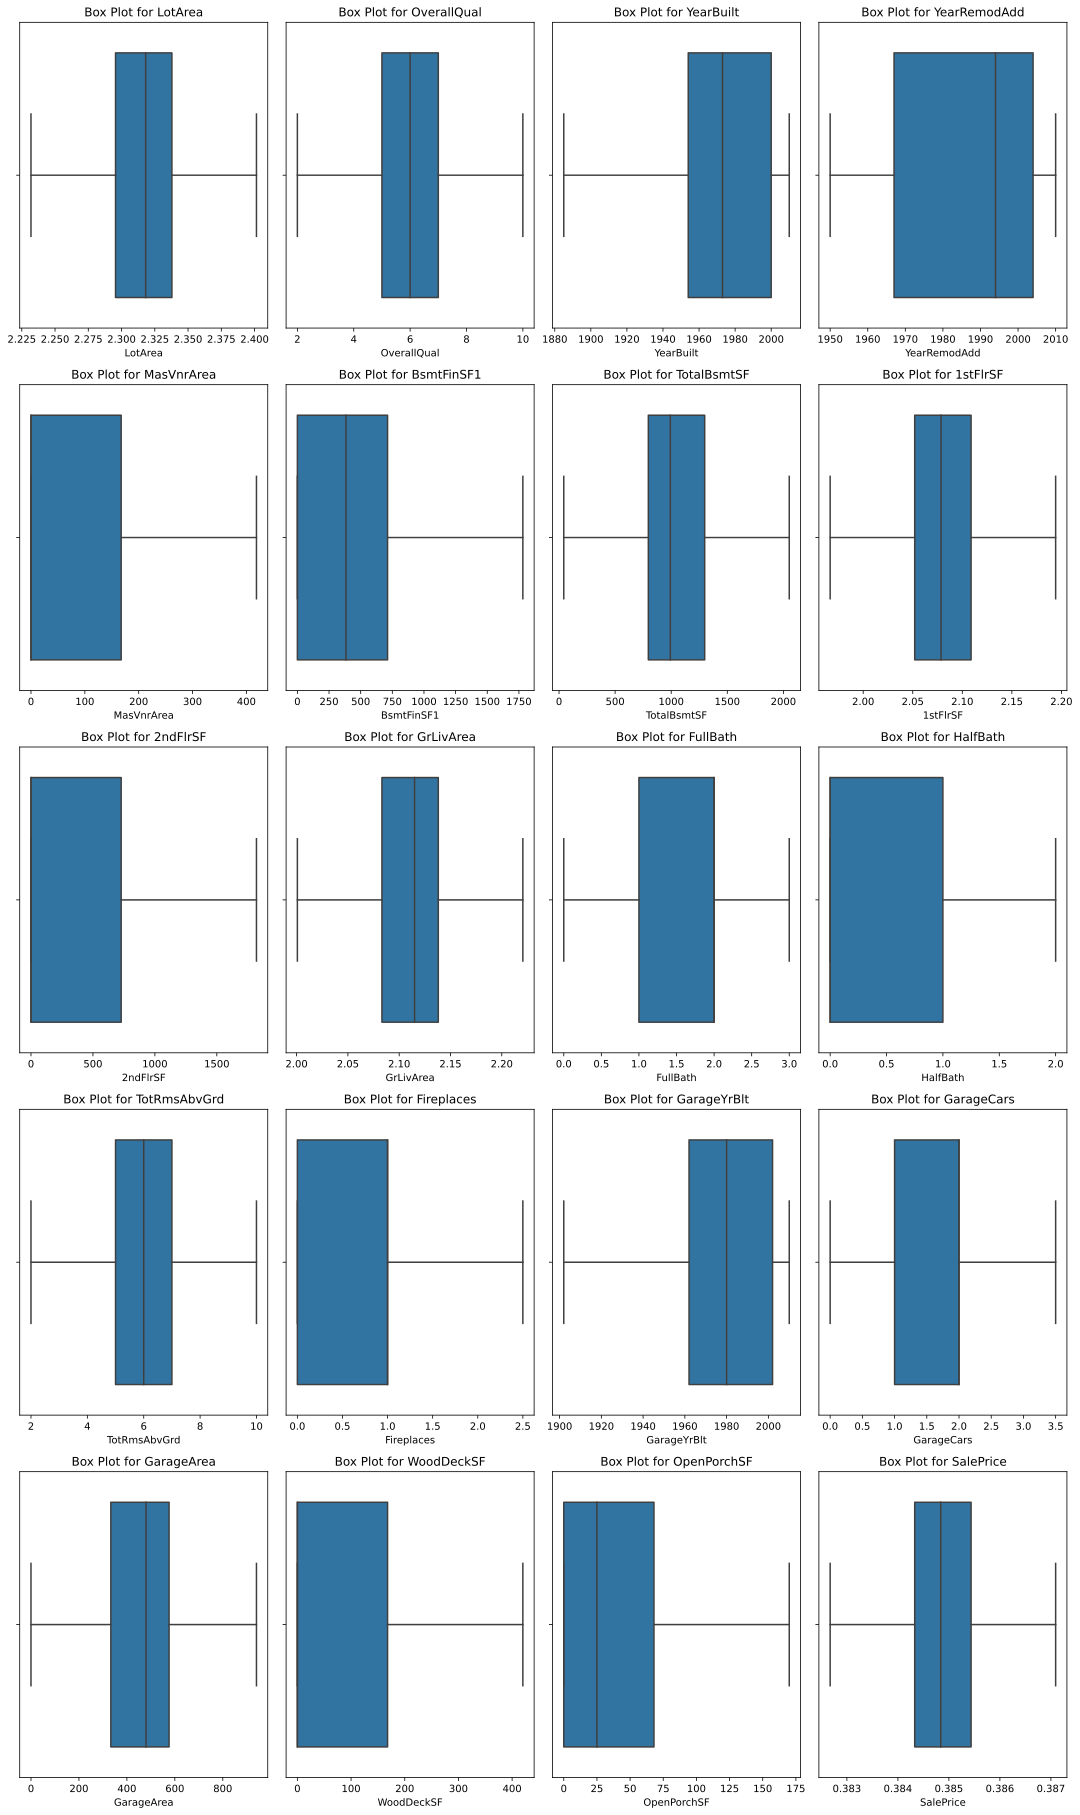

In [37]:
print("This plot shows the outliers in each column after deleting them")

numerical_features = df.drop(columns="Id").select_dtypes(include=['number'])

num_features = len(numerical_features.columns)
num_rows = 8  # No. of rows
num_cols = 4  # No. of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(numerical_features.columns):
    if i < num_features:
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot for {column}')
for i in range(len(numerical_features.columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## Feature Encoding

In [38]:
obj_col = df.select_dtypes(include=['object']).columns
obj_col = pd.DataFrame(obj_col, columns=["text col"])
print(f"Number of columns that have text: {obj_col.shape[0]}")
obj_col.head()

Number of columns that have text: 37


text col
0     MSZoning
1       Street
2     LotShape
3  LandContour
4    Utilities

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in obj_col.values.flatten():
    df[col] = encoder.fit_transform(df[col])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotArea        1459 non-null   float64
 3   Street         1459 non-null   int32  
 4   LotShape       1459 non-null   int32  
 5   LandContour    1459 non-null   int32  
 6   Utilities      1459 non-null   int32  
 7   LotConfig      1459 non-null   int32  
 8   LandSlope      1459 non-null   int32  
 9   Neighborhood   1459 non-null   int32  
 10  Condition1     1459 non-null   int32  
 11  Condition2     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  YearBuilt      1459 non-null   int64  
 16  YearRemodAdd   1459 non-null   float64
 17  RoofStyle      1459 non-null   int32  
 18  RoofMatl     

## Model Building and Enhancing

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [42]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1:].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [44]:
scaler = StandardScaler(copy=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LinearRegression(), X_train, y_train, cv=cv)
print("Cross-validated scores:", scores)
print(f"Mean Cross-validated-accuracy: {scores.mean()}")

Cross-validated scores: [  0.89767817   0.8876905  -60.57000595   0.91321527   0.89796196]
Mean Cross-validated-accuracy: -11.394692009699087


In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")

Train score: 0.9007252741366386
Test score: 0.8764122717036789


In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.00021049818455087116
Mean Squared Error: 1.0020742076253643e-07
Root Mean Squared Error: 0.0003165555571499834


In [50]:
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R^2): {r2}")

Coefficient of Determination (R^2): 0.8764122717036789


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], "p": [1, 2]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [52]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 7, 'p': 1}


In [53]:
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7, p=1)

In [54]:
y_pred_knn = knn_model.predict(X_test)

In [55]:
scores_knn = cross_val_score(knn_model, X_train, y_train, cv=5)
average_score_knn = scores_knn.mean()
print(f"Cross-Validation score (KNN): {average_score_knn}")

Cross-Validation score (KNN): 0.834984612221608


In [57]:
pd.DataFrame(grid_search.cv_results_).to_csv("/kaggle/Datasets/grid_search_KNN.csv")
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000903      0.000199         0.163999        0.171865   
1       0.000800      0.000400         0.079316        0.001607   
2       0.001020      0.000027         0.079810        0.002905   
3       0.000906      0.000201         0.075834        0.003131   
4       0.001026      0.000048         0.079560        0.001936   
5       0.000803      0.000401         0.075871        0.003011   
6       0.000902      0.000200         0.078648        0.003970   
7       0.001201      0.000399         0.074429        0.001600   
8       0.001002      0.000002         0.076156        0.002094   
9       0.000802      0.000401         0.076971        0.001537   

  param_n_neighbors param_p                       params  split0_test_score  \
0                 3       1   {'n_neighbors': 3, 'p': 1}           0.867991   
1                 3       2   {'n_neighbors': 3, 'p': 2}           0.803704   
2                 5       1   {'n_neighbors': 5, 'p': 1}           0.874908   
3                 5       2   {'n_neighbors': 5, 'p': 2}           0.838480   
4                 7       1   {'n_neighbors': 7, 'p': 1}           0.879024   
5                 7       2   {'n_neighbors': 7, 'p': 2}           0.847600   
6                 9       1   {'n_neighbors': 9, 'p': 1}           0.873378   
7                 9       2   {'n_neighbors': 9, 'p': 2}           0.854388   
8                11       1  {'n_neighbors': 11, 'p': 1}           0.876963   
9                11       2  {'n_neighbors': 11, 'p': 2}           0.848550   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.832022           0.851411           0.810546           0.797801   
1           0.793306           0.820412           0.727985           0.752393   
2           0.829179           0.845815           0.811730           0.811258   
3           0.797074           0.827985           0.753155           0.769819   
4           0.828598           0.845632           0.808360           0.813309   
5           0.803232           0.832256           0.765605           0.783482   
6           0.824603           0.844348           0.809407           0.805410   
7           0.805571           0.829375           0.768156           0.795966   
8           0.823327           0.840757           0.807826           0.804101   
9           0.799163           0.827848           0.766444           0.789770   

   mean_test_score  std_test_score  rank_test_score  
0         0.831954        0.025698                3  
1         0.779560        0.034173               10  
2         0.834578        0.023866                2  
3         0.797302        0.032685                9  
4         0.834985        0.025583                1  
5         0.806435        0.030217                7  
6         0.831429        0.025041                4  
7         0.810691        0.029363                6  
8         0.830595        0.026557                5  
9         0.806355        0.028851                8

In [59]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Absolute Error: 0.00021049818455087116
Mean Squared Error: 1.0020742076253643e-07
Root Mean Squared Error: 0.0003165555571499834
Coefficient of Determination (R^2): 0.8764122717036789


In [60]:
test_df = pd.read_csv("/kaggle/Datasets/test.csv")

In [61]:
import statsmodels.api as sm
X_train_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_intercept).fit()

In [62]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:04:28   Log-Likelihood:                 8938.0
No. Observations:                1313   AIC:                        -1.776e+04
Df Residuals:                    1255   BIC:                        -1.746e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3849   7.55e-06    5.1e+04      0.0

## Make prediction plot

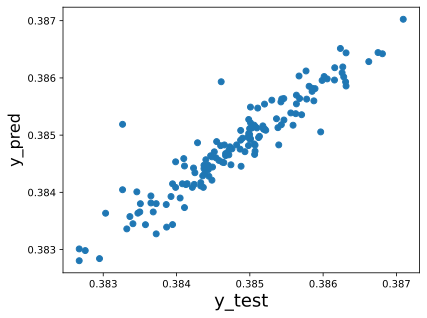

In [63]:
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                        
plt.ylabel('y_pred', fontsize=16)
plt.show()